In [1]:
# %matplotlib inline
import torch
from torch import nn
import numpy as np
from torch.utils import data
from io import StringIO
import random
from d2l import torch as d2l
from matplotlib import pyplot as plt
import glob
import os
import re

In [2]:
# import data
def moduli_read(d_dir, d_size):
    moduli = np.empty(shape = (0, 1))

    fmoduli_name = r'\results.txt'
    fmoduli_dir = d_dir + fmoduli_name
    moduli_read = np.genfromtxt (fmoduli_dir, dtype = str, delimiter = '\t')

    index_z = np.linspace(2, int(7*d_size)-5, num = d_size)
    index_y = np.linspace(4, int(7*d_size)-3, num = d_size)
    index_x = np.linspace(6, int(7*d_size)-1, num = d_size)
    moduli_z = np.char.split(moduli_read[index_z.astype(int)])
    moduli_y = np.char.split(moduli_read[index_y.astype(int)])
    moduli_x = np.char.split(moduli_read[index_x.astype(int)])

    for i in range(d_size):
        moduli_z[i] =  moduli_z[i][0]
        moduli_y[i] =  moduli_y[i][1]
        moduli_x[i] =  moduli_x[i][2]

    moduli_x = moduli_x.astype(float)  
    moduli_y = moduli_y.astype(float)  
    moduli_z = moduli_z.astype(float)  
    
    return moduli_x, moduli_y, moduli_z

In [160]:
# load surr results
surr_modu_dir_pg_s = './data20221025/surr_moduli/'
surr_modu_dir_good = './data20221025/good_data/moduli/'
fmodu_results = glob.glob(os.path.join(surr_modu_dir_pg_s, '*.pt'))
fmodu_results_good = glob.glob(os.path.join(surr_modu_dir_good, '*.pt'))
l_fmodu = len(fmodu_results)
l_fmodu_good = len(fmodu_results_good)
g_moduli = np.empty([l_fmodu,1000,8,3])
g_moduli_good = np.empty([l_fmodu_good,300,3])

for i in range (l_fmodu):
    g_modu_load = torch.load(fmodu_results[i], map_location=torch.device('cpu'))
    g_moduli[i,:,:,:] = g_modu_load.cpu().detach() 
    
for i in range (l_fmodu_good):
    g_modu_load_good = torch.load(fmodu_results_good[i], map_location=torch.device('cpu'))
    g_moduli_good[i,:,:] = g_modu_load_good.cpu().detach() 

surr_modu_pg_s = g_moduli[3]
surr_modu_pg_s_x = surr_modu_pg_s[:,:,0].reshape(-1)
surr_modu_pg_s_y = surr_modu_pg_s[:,:,1].reshape(-1)
surr_modu_pg_s_z = surr_modu_pg_s[:,:,2].reshape(-1)

surr_modu_pg_r = g_moduli[2]
surr_modu_pg_r_x = surr_modu_pg_r[:,:,0].reshape(-1)
surr_modu_pg_r_y = surr_modu_pg_r[:,:,1].reshape(-1)
surr_modu_pg_r_z = surr_modu_pg_r[:,:,2].reshape(-1)

surr_modu_lg_s = g_moduli[1]
surr_modu_lg_s_x = surr_modu_lg_s[:,:,0].reshape(-1)
surr_modu_lg_s_y = surr_modu_lg_s[:,:,1].reshape(-1)
surr_modu_lg_s_z = surr_modu_lg_s[:,:,2].reshape(-1)

surr_modu_lg_r = g_moduli[0]
surr_modu_lg_r_x = surr_modu_lg_r[:,:,0].reshape(-1)
surr_modu_lg_r_y = surr_modu_lg_r[:,:,1].reshape(-1)
surr_modu_lg_r_z = surr_modu_lg_r[:,:,2].reshape(-1)

surr_modu_sg_s = g_moduli[5]
surr_modu_sg_s_x = surr_modu_sg_s[:,:,0].reshape(-1)
surr_modu_sg_s_y = surr_modu_sg_s[:,:,1].reshape(-1)
surr_modu_sg_s_z = surr_modu_sg_s[:,:,2].reshape(-1)

surr_modu_sg_r = g_moduli[4]
surr_modu_sg_r_x = surr_modu_sg_r[:,:,0].reshape(-1)
surr_modu_sg_r_y = surr_modu_sg_r[:,:,1].reshape(-1)
surr_modu_sg_r_z = surr_modu_sg_r[:,:,2].reshape(-1)

surr_modu_tg_s = g_moduli[7]
surr_modu_tg_s_x = surr_modu_tg_s[:,:,0].reshape(-1)
surr_modu_tg_s_y = surr_modu_tg_s[:,:,1].reshape(-1)
surr_modu_tg_s_z = surr_modu_tg_s[:,:,2].reshape(-1)

surr_modu_tg_r = g_moduli[6]
surr_modu_tg_r_x = surr_modu_tg_r[:,:,0].reshape(-1)
surr_modu_tg_r_y = surr_modu_tg_r[:,:,1].reshape(-1)
surr_modu_tg_r_z = surr_modu_tg_r[:,:,2].reshape(-1)
 
surr_modu_good_l_lg_r = g_moduli_good[0]
surr_modu_good_l_lg_r_x = surr_modu_good_l_lg_r[:,0]
surr_modu_good_l_lg_r_y = surr_modu_good_l_lg_r[:,1]
surr_modu_good_l_lg_r_z = surr_modu_good_l_lg_r[:,2]

surr_modu_good_l_lg_s = g_moduli_good[1]
surr_modu_good_l_lg_s_x = surr_modu_good_l_lg_s[:,0]
surr_modu_good_l_lg_s_y = surr_modu_good_l_lg_s[:,1]
surr_modu_good_l_lg_s_z = surr_modu_good_l_lg_s[:,2]

surr_modu_good_l_pg_r = g_moduli_good[2]
surr_modu_good_l_pg_r_x = surr_modu_good_l_pg_r[:,0]
surr_modu_good_l_pg_r_y = surr_modu_good_l_pg_r[:,1]
surr_modu_good_l_pg_r_z = surr_modu_good_l_pg_r[:,2]

surr_modu_good_l_pg_s = g_moduli_good[3]
surr_modu_good_l_pg_s_x = surr_modu_good_l_pg_s[:,0]
surr_modu_good_l_pg_s_y = surr_modu_good_l_pg_s[:,1]
surr_modu_good_l_pg_s_z = surr_modu_good_l_pg_s[:,2]

surr_modu_good_l_tg_r = g_moduli_good[4]
surr_modu_good_l_tg_r_x = surr_modu_good_l_tg_r[:,0]
surr_modu_good_l_tg_r_y = surr_modu_good_l_tg_r[:,1]
surr_modu_good_l_tg_r_z = surr_modu_good_l_tg_r[:,2]

surr_modu_good_l_tg_s = g_moduli_good[5]
surr_modu_good_l_tg_s_x = surr_modu_good_l_tg_s[:,0]
surr_modu_good_l_tg_s_y = surr_modu_good_l_tg_s[:,1]
surr_modu_good_l_tg_s_z = surr_modu_good_l_tg_s[:,2]

surr_modu_good_s_pg_r = g_moduli_good[6]
surr_modu_good_s_pg_r_x = surr_modu_good_s_pg_r[:,0]
surr_modu_good_s_pg_r_y = surr_modu_good_s_pg_r[:,1]
surr_modu_good_s_pg_r_z = surr_modu_good_s_pg_r[:,2]

surr_modu_good_s_pg_s = g_moduli_good[7]
surr_modu_good_s_pg_s_x = surr_modu_good_s_pg_s[:,0]
surr_modu_good_s_pg_s_y = surr_modu_good_s_pg_s[:,1]
surr_modu_good_s_pg_s_z = surr_modu_good_s_pg_s[:,2]

surr_modu_good_s_sg_r = g_moduli_good[8]
surr_modu_good_s_sg_r_x = surr_modu_good_s_sg_r[:,0]
surr_modu_good_s_sg_r_y = surr_modu_good_s_sg_r[:,1]
surr_modu_good_s_sg_r_z = surr_modu_good_s_sg_r[:,2]

surr_modu_good_s_sg_s = g_moduli_good[9]
surr_modu_good_s_sg_s_x = surr_modu_good_s_sg_s[:,0]
surr_modu_good_s_sg_s_y = surr_modu_good_s_sg_s[:,1]
surr_modu_good_s_sg_s_z = surr_modu_good_s_sg_s[:,2]

surr_modu_good_s_tg_r = g_moduli_good[10]
surr_modu_good_s_tg_r_x = surr_modu_good_s_tg_r[:,0]
surr_modu_good_s_tg_r_y = surr_modu_good_s_tg_r[:,1]
surr_modu_good_s_tg_r_z = surr_modu_good_s_tg_r[:,2]

surr_modu_good_s_tg_s = g_moduli_good[11]
surr_modu_good_s_tg_s_x = surr_modu_good_s_tg_s[:,0]
surr_modu_good_s_tg_s_y = surr_modu_good_s_tg_s[:,1]
surr_modu_good_s_tg_s_z = surr_modu_good_s_tg_s[:,2]


print(g_moduli.shape, '\n', surr_modu_tg_r_x.shape, '\n', surr_modu_good_l_tg_r.shape)

(8, 1000, 8, 3) 
 (8000,) 
 (300, 3)


In [104]:
fmodu_results_good

['./data20221025/good_data/moduli\\large_moduli_good_data_moduli_large_moduli_gan_random_1_2_1_channel.pt',
 './data20221025/good_data/moduli\\large_moduli_good_data_moduli_large_moduli_gan_symm_1_2_1_channel.pt',
 './data20221025/good_data/moduli\\large_moduli_good_data_moduli_pure_gan_random_1_2_1_channel.pt',
 './data20221025/good_data/moduli\\large_moduli_good_data_moduli_pure_gan_symm_1_2_1_channel.pt',
 './data20221025/good_data/moduli\\large_moduli_good_data_moduli_total_goal_gan_random_1_2_1_channel.pt',
 './data20221025/good_data/moduli\\large_moduli_good_data_moduli_total_goal_gan_symm_1_2_1_channel.pt',
 './data20221025/good_data/moduli\\symm_moduli_good_data_moduli_pure_gan_random_1_2_1_channel.pt',
 './data20221025/good_data/moduli\\symm_moduli_good_data_moduli_pure_gan_symm_1_2_1_channel.pt',
 './data20221025/good_data/moduli\\symm_moduli_good_data_moduli_symm_moduli_gan_random_1_2_1_channel.pt',
 './data20221025/good_data/moduli\\symm_moduli_good_data_moduli_symm_moduli_

In [155]:
# load fem results

fmoduli_dir_pg_s = (r'c:\strut\pg_s')
fmoduli_dir_pg_r = (r'c:\strut\pg_r')
fmoduli_dir_lg_s = (r'c:\strut\lg_s')
fmoduli_dir_lg_r = (r'c:\strut\lg_r')
fmoduli_dir_sg_s = (r'c:\strut\sg_s')
fmoduli_dir_sg_r = (r'c:\strut\sg_r')
fmoduli_dir_tg_s = (r'c:\strut\tg_s')
fmoduli_dir_tg_r = (r'c:\strut\tg_r')
fmoduli_dir_good = (r'c:\strut\good')

d_size = 8000
d_size_good = 3600

moduli_x_pg_s, moduli_y_pg_s, moduli_z_pg_s = moduli_read(fmoduli_dir_pg_s, d_size)
moduli_x_pg_r, moduli_y_pg_r, moduli_z_pg_r = moduli_read(fmoduli_dir_pg_r, d_size)
moduli_x_lg_s, moduli_y_lg_s, moduli_z_lg_s = moduli_read(fmoduli_dir_lg_s, d_size)
moduli_x_lg_r, moduli_y_lg_r, moduli_z_lg_r = moduli_read(fmoduli_dir_lg_r, d_size)
moduli_x_sg_s, moduli_y_sg_s, moduli_z_sg_s = moduli_read(fmoduli_dir_sg_s, d_size)
moduli_x_sg_r, moduli_y_sg_r, moduli_z_sg_r = moduli_read(fmoduli_dir_sg_r, d_size)
moduli_x_tg_r, moduli_y_tg_r, moduli_z_tg_r = moduli_read(fmoduli_dir_tg_r, d_size)
moduli_x_tg_s, moduli_y_tg_s, moduli_z_tg_s = moduli_read(fmoduli_dir_tg_s, d_size)
moduli_x_good, moduli_y_good, moduli_z_good = moduli_read(fmoduli_dir_good, d_size_good)

modu_good_l_lg_r_x = moduli_x_good[0:300]
modu_good_l_lg_r_y = moduli_y_good[0:300]
modu_good_l_lg_r_z = moduli_z_good[0:300]
modu_good_l_lg_s_x = moduli_x_good[300:600]
modu_good_l_lg_s_y = moduli_y_good[300:600]
modu_good_l_lg_s_z = moduli_z_good[300:600]

modu_good_l_pg_r_x = moduli_x_good[600:900]
modu_good_l_pg_r_y = moduli_y_good[600:900]
modu_good_l_pg_r_z = moduli_z_good[600:900]
modu_good_l_pg_s_x = moduli_x_good[900:1200]
modu_good_l_pg_s_y = moduli_y_good[900:1200]
modu_good_l_pg_s_z = moduli_z_good[900:1200]

modu_good_l_tg_r_x = moduli_x_good[1200:1500]
modu_good_l_tg_r_y = moduli_y_good[1200:1500]
modu_good_l_tg_r_z = moduli_z_good[1200:1500]
modu_good_l_tg_s_x = moduli_x_good[1500:1800]
modu_good_l_tg_s_y = moduli_y_good[1500:1800]
modu_good_l_tg_s_z = moduli_z_good[1500:1800]

modu_good_s_pg_r_x = moduli_x_good[1800:2100]
modu_good_s_pg_r_y = moduli_y_good[1800:2100]
modu_good_s_pg_r_z = moduli_z_good[1800:2100]
modu_good_s_pg_s_x = moduli_x_good[2100:2400]
modu_good_s_pg_s_y = moduli_y_good[2100:2400]
modu_good_s_pg_s_z = moduli_z_good[2100:2400]

modu_good_s_sg_r_x = moduli_x_good[2400:2700]
modu_good_s_sg_r_y = moduli_y_good[2400:2700]
modu_good_s_sg_r_z = moduli_z_good[2400:2700]
modu_good_s_sg_s_x = moduli_x_good[2700:3000]
modu_good_s_sg_s_y = moduli_y_good[2700:3000]
modu_good_s_sg_s_z = moduli_z_good[2700:3000]

modu_good_s_tg_r_x = moduli_x_good[3000:3300]
modu_good_s_tg_r_y = moduli_y_good[3000:3300]
modu_good_s_tg_r_z = moduli_z_good[3000:3300]
modu_good_s_tg_s_x = moduli_x_good[3300:3600]
modu_good_s_tg_s_y = moduli_y_good[3300:3600]
modu_good_s_tg_s_z = moduli_z_good[3300:3600]




In [156]:
print('', moduli_x_pg_s.shape, '\n', moduli_x_good.shape, '\n', modu_good_s_tg_s_x.shape)

 (8000,) 
 (3600,) 
 (300,)


In [39]:
# # check
# print('', moduli_x_pg_s.shape,'\n',moduli_y_pg_s.shape,'\n',moduli_z_pg_s.shape,'\n')
# print('', moduli_x_pg_s.shape,'\n',moduli_x_pg_r.shape,'\n',
#       moduli_x_lg_s.shape,'\n',moduli_x_lg_r.shape,'\n',
#       moduli_x_sg_s.shape,'\n',moduli_x_sg_r.shape,'\n')
# print(moduli_x_sg_s[:20])

In [12]:
moduli_non, elems_fnl_non, moduli, elems_fnl = torch.load(r'c:\compml\training_data.pt')

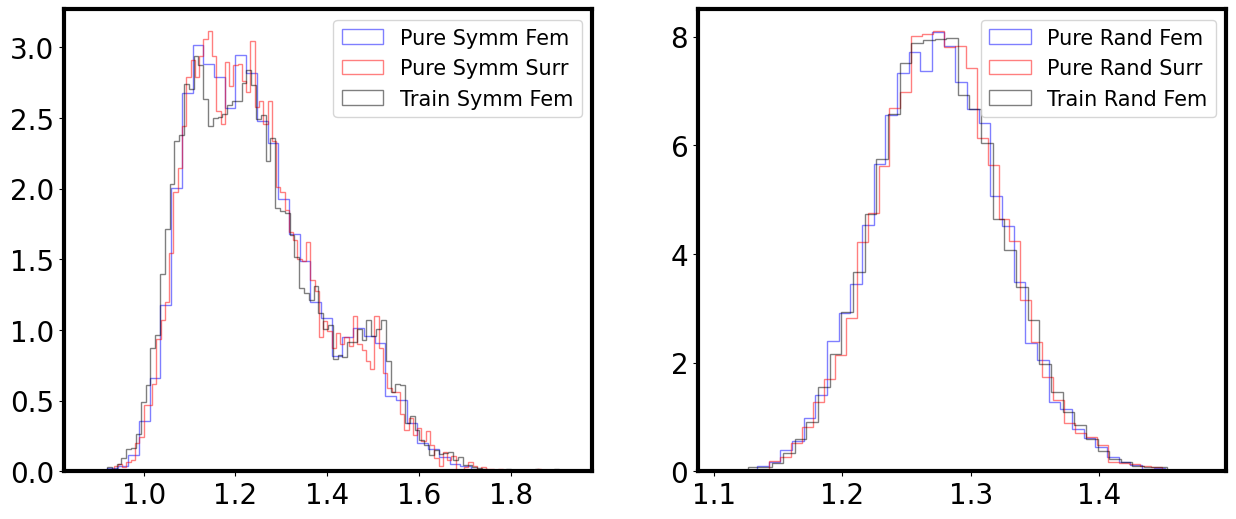

In [74]:
# moduli pure gan x, symm, rand
labels_pg_s = ['Pure Symm Fem','Pure Symm Surr']
labels_pg_r = ['Pure Rand Fem','Pure Rand Surr']

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
plt_x_pg_s = ax0.hist(moduli_x_pg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = labels_pg_s[0])
plt_x_pg_s_surr = ax0.hist(surr_modu_pg_s_x.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = labels_pg_s[1])
plt_x_train_s = ax0.hist(moduli[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = 'Train Symm Fem')
ax0.legend(prop={'size': 15})

plt_x_pg_r = ax1.hist(moduli_x_pg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = labels_pg_r[0])
plt_x_pg_r = ax1.hist(surr_modu_pg_r_x.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = labels_pg_r [1])
plt_x_train_r = ax1.hist(moduli_non[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = 'Train Rand Fem')
ax1.legend(prop={'size': 15})

font_size = 20
# plt.legend([plt_x_pg_s, plt_x_lg_s], 
#            ['moduli_fem gen pg_s', 'moduli_fem gen lg_s'],
#            loc=(0.1,0.25), fontsize = 18, ncol = 2)
ax0.tick_params(labelsize=font_size)
ax1.tick_params(labelsize=font_size)

ax0.spines[['left','right','bottom','top']].set_linewidth(3)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)


plt.show()

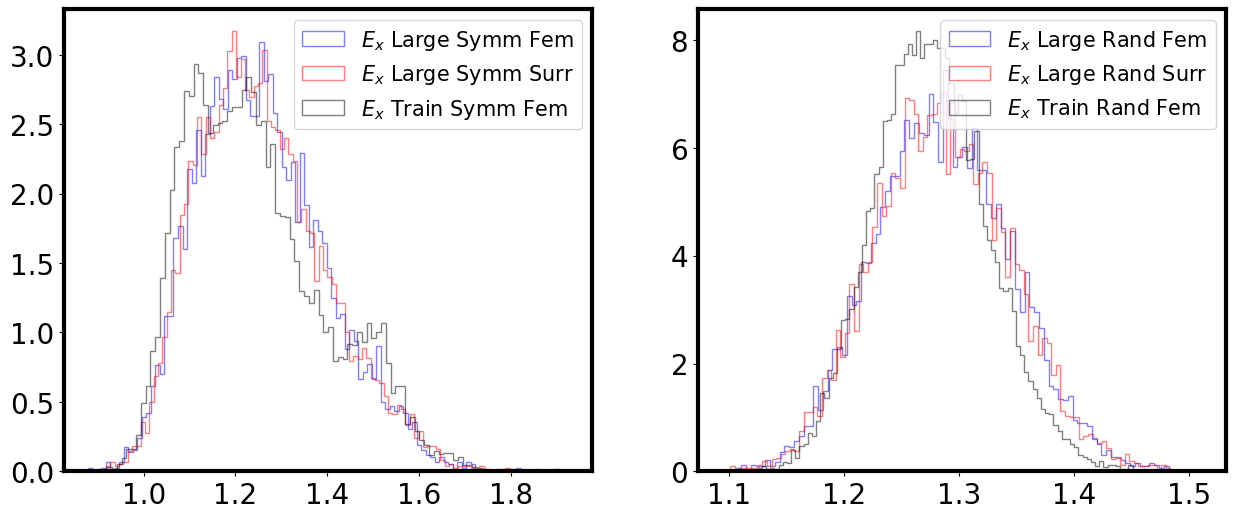

In [123]:
# moduli large gan x 
labels_lg_s = ['Large Symm Fem','Large Symm Surr']
labels_lg_r = ['Large Rand Fem','Large Rand Surr']

fig, ((ax0, ax1)) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))


plt_x_lg_s = ax0.hist(moduli_x_lg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_lg_s[0])
plt_x_lg_s_surr = ax0.hist(surr_modu_lg_s_x.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_lg_s[1])
plt_x_train_s = ax0.hist(moduli[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Symm Fem')
ax0.legend(prop={'size': 15})

plt_x_lg_r = ax1.hist(moduli_x_lg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_lg_r[0])
plt_x_lg_r = ax1.hist(surr_modu_lg_r_x.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_lg_r[1])
plt_x_train_r = ax1.hist(moduli_non[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Rand Fem')
ax1.legend(prop={'size': 15})

ax0.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)
ax1.tick_params(labelsize=font_size)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)
plt.show()

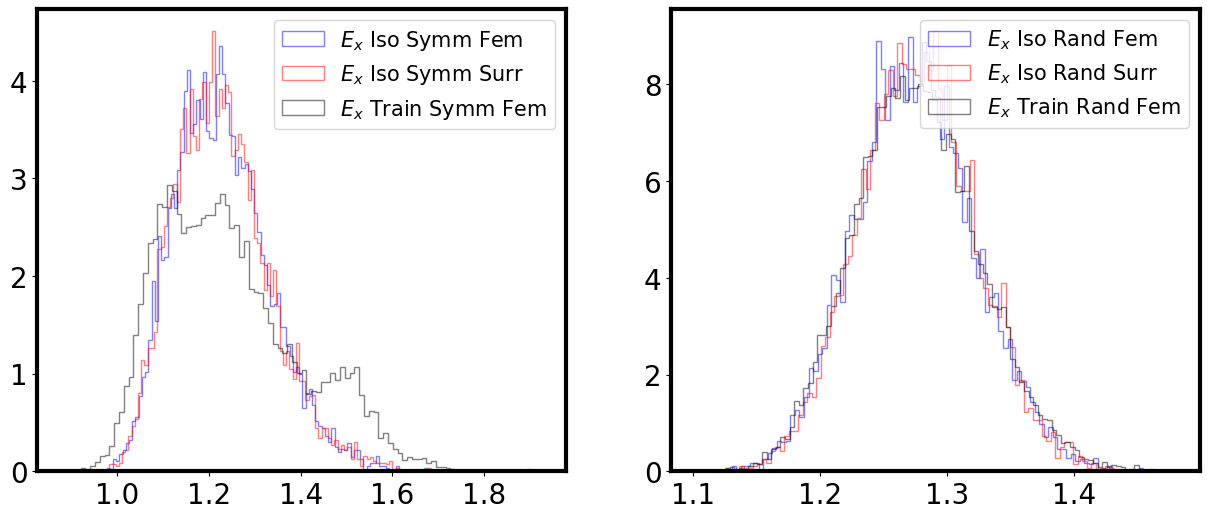

In [184]:
# moduli symm gan x 
labels_sg_s = ['Iso Symm Fem','Iso Symm Surr']
labels_sg_r = ['Iso Rand Fem','Iso Rand Surr']

fig, ((ax0, ax1)) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))

plt_x_sg_s = ax0.hist(moduli_x_sg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_sg_s[0])
plt_x_sg_s_surr = ax0.hist(surr_modu_sg_s_x.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_sg_s[1])
plt_x_train_s = ax0.hist(moduli[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Symm Fem')

ax0.legend(prop={'size': 15})
ax0.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)

plt_x_sg_r = ax1.hist(moduli_x_sg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_sg_r[0])
plt_x_sg_r = ax1.hist(surr_modu_sg_r_x.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_sg_r[1])
plt_x_train_r = ax1.hist(moduli_non[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Rand Fem')
ax1.legend(prop={'size': 15})
ax1.tick_params(labelsize=font_size)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)

plt.show()

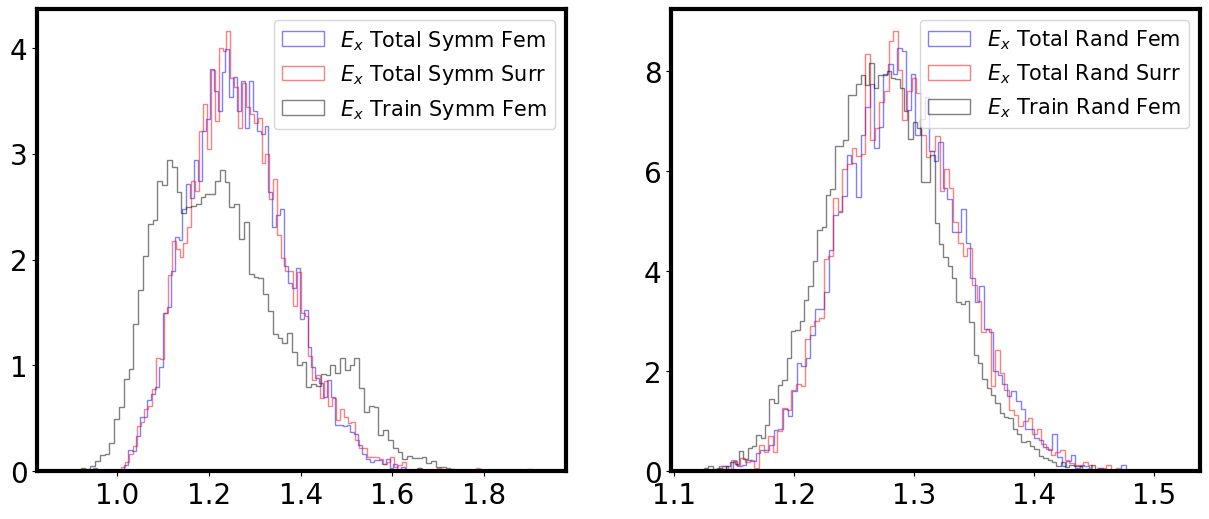

In [185]:
# moduli total gan x 
labels_tg_s = ['Total Symm Fem','Total Symm Surr']
labels_tg_r = ['Total Rand Fem','Total Rand Surr']

fig, ((ax0, ax1)) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))

plt_x_tg_s = ax0.hist(moduli_x_tg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_tg_s[0])
plt_x_tg_s_surr = ax0.hist(surr_modu_tg_s_x.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_tg_s[1])
plt_x_train_s = ax0.hist(moduli[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Symm Fem')

ax0.legend(prop={'size': 15})
ax0.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)

plt_x_tg_r = ax1.hist(moduli_x_tg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_tg_r[0])
plt_x_tg_r = ax1.hist(surr_modu_tg_r_x.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_tg_r[1])
plt_x_train_r = ax1.hist(moduli_non[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Rand Fem')

ax1.legend(prop={'size': 15})
ax1.tick_params(labelsize=font_size)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)

plt.show()

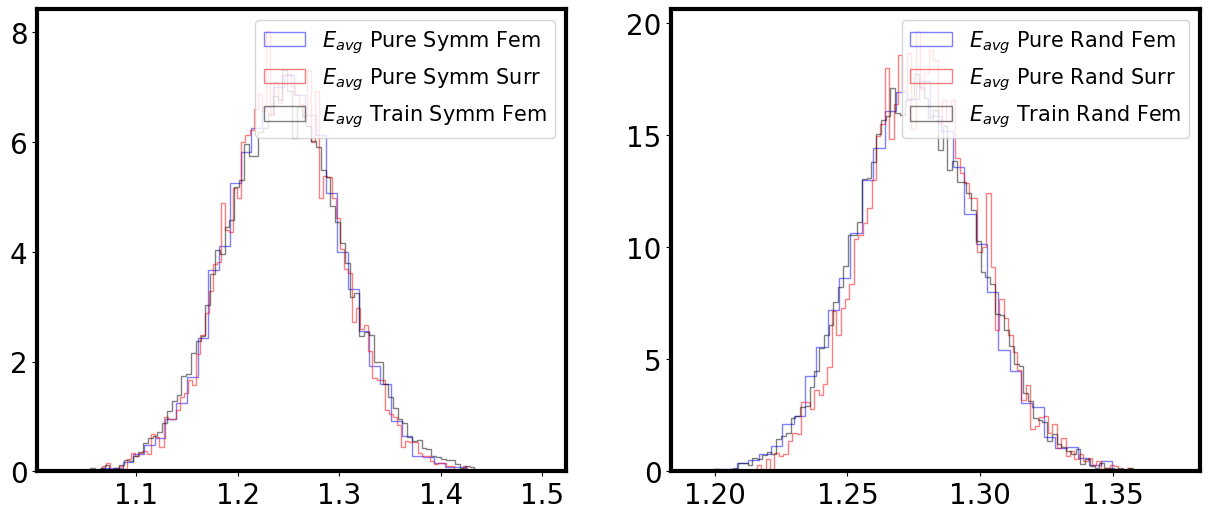

In [96]:
# moduli pure gan avg

fig, ((ax4, ax5)) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))

moduli_avg_pg_s = (moduli_x_pg_s + moduli_y_pg_s + moduli_z_pg_s)/3
surr_modu_pg_s_avg = (surr_modu_pg_s_x + surr_modu_pg_s_y + surr_modu_pg_s_z)/3
moduli_avg = np.mean(moduli, axis = 1)
plt_x_pg_s = ax4.hist(moduli_avg_pg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_pg_s[0])
plt_x_pg_s_surr = ax4.hist(surr_modu_pg_s_avg.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_pg_s[1])
plt_x_train_s = ax4.hist(moduli_avg.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Symm Fem')
                      
ax4.legend(prop={'size': 15})
ax4.tick_params(labelsize=font_size)
ax4.spines[['left','right','bottom','top']].set_linewidth(3)

moduli_avg_pg_r = (moduli_x_pg_r + moduli_y_pg_r + moduli_z_pg_r)/3
surr_modu_pg_r_avg = (surr_modu_pg_r_x + surr_modu_pg_r_y + surr_modu_pg_r_z)/3
moduli_avg_non = np.mean(moduli_non, axis = 1)
plt_x_pg_r = ax5.hist(moduli_avg_pg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_pg_r[0])
plt_x_pg_r_surr = ax5.hist(surr_modu_pg_r_avg.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_pg_r[1])
plt_x_train_r = ax5.hist(moduli_avg_non.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Rand Fem')

ax5.legend(prop={'size': 15})
ax5.tick_params(labelsize=font_size)
ax5.spines[['left','right','bottom','top']].set_linewidth(3)


plt.show()

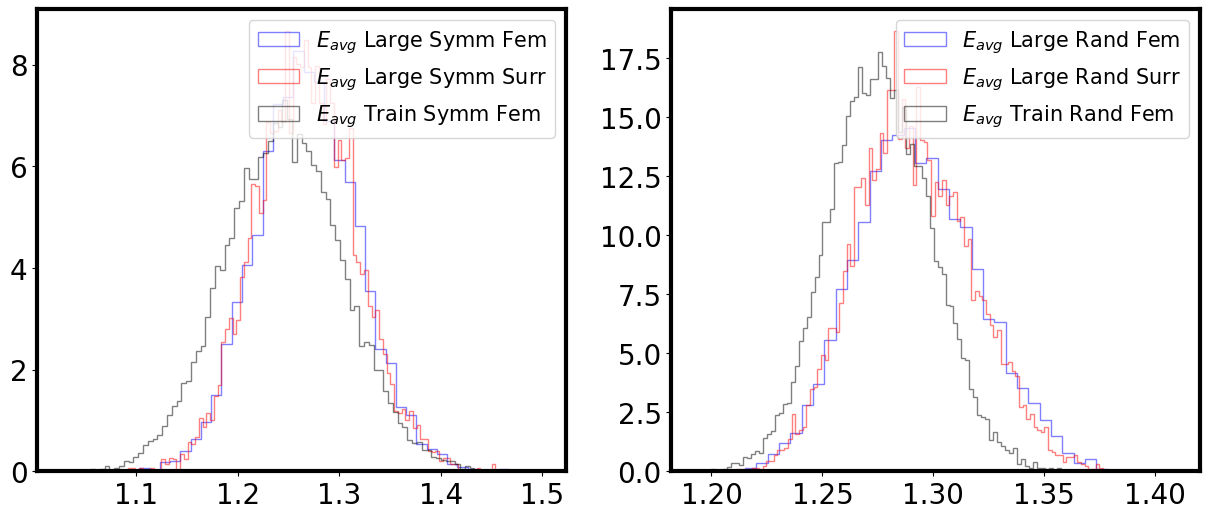

In [97]:
# moduli large gan avg

fig, ((ax4, ax5)) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))

moduli_avg_lg_s = (moduli_x_lg_s + moduli_y_lg_s + moduli_z_lg_s)/3
surr_modu_lg_s_avg = (surr_modu_lg_s_x + surr_modu_lg_s_y + surr_modu_lg_s_z)/3
moduli_avg = np.mean(moduli, axis = 1)
plt_avg_lg_s = ax4.hist(moduli_avg_lg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_lg_s[0])
plt_avg_lg_s_surr = ax4.hist(surr_modu_lg_s_avg.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_lg_s[1])
plt_x_train_s = ax4.hist(moduli_avg.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Symm Fem')

ax4.legend(prop={'size': 15})
ax4.tick_params(labelsize=font_size)
ax4.spines[['left','right','bottom','top']].set_linewidth(3)

moduli_avg_lg_r = (moduli_x_lg_r + moduli_y_lg_r + moduli_z_lg_r)/3
surr_modu_lg_r_avg = (surr_modu_lg_r_x + surr_modu_lg_r_y + surr_modu_lg_r_z)/3
moduli_avg_non = np.mean(moduli_non, axis = 1)
plt_avg_lg_r = ax5.hist(moduli_avg_lg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_lg_r[0])
plt_avg_lg_r_surr = ax5.hist(surr_modu_lg_r_avg.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_lg_r[1])
plt_x_train_r = ax5.hist(moduli_avg_non.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Rand Fem')

ax5.legend(prop={'size': 15})
ax5.tick_params(labelsize=font_size)
ax5.spines[['left','right','bottom','top']].set_linewidth(3)

plt.show()

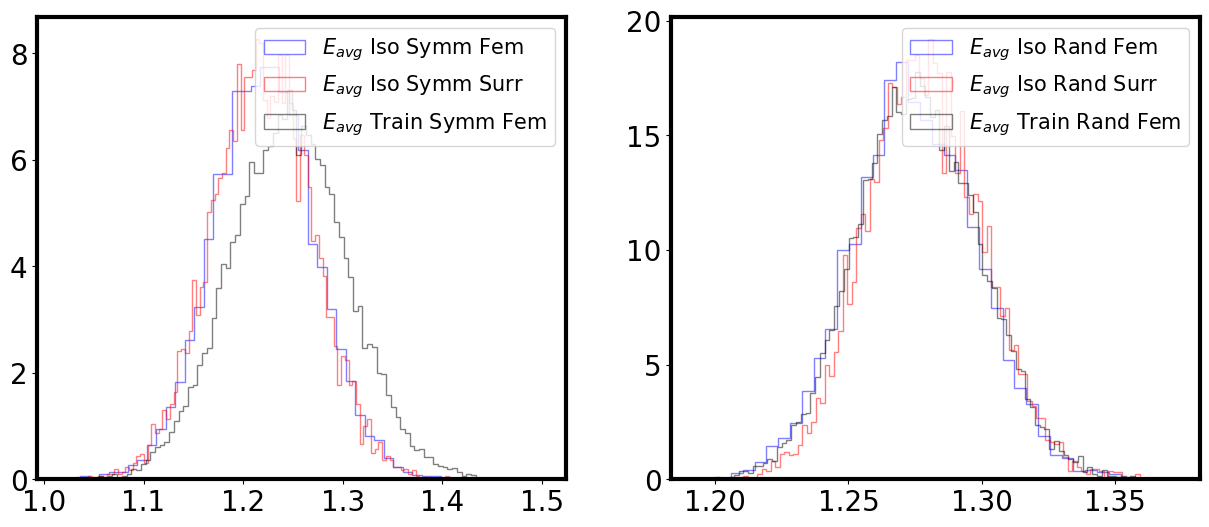

In [98]:
# moduli symm gan avg

fig, ((ax4, ax5)) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))

moduli_avg_sg_s = (moduli_x_sg_s + moduli_y_sg_s + moduli_z_sg_s)/3
surr_modu_sg_s_avg = (surr_modu_sg_s_x + surr_modu_sg_s_y + surr_modu_sg_s_z)/3
moduli_avg = np.mean(moduli, axis = 1)
plt_avg_sg_s = ax4.hist(moduli_avg_sg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_sg_s[0])
plt_avg_sg_s_surr = ax4.hist(surr_modu_sg_s_avg.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_sg_s[1])
plt_x_train_s = ax4.hist(moduli_avg.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Symm Fem')

ax4.legend(prop={'size': 15})
ax4.tick_params(labelsize=font_size)
ax4.spines[['left','right','bottom','top']].set_linewidth(3)

moduli_avg_sg_r = (moduli_x_sg_r + moduli_y_sg_r + moduli_z_sg_r)/3
surr_modu_sg_r_avg = (surr_modu_sg_r_x + surr_modu_sg_r_y + surr_modu_sg_r_z)/3
moduli_avg_non = np.mean(moduli_non, axis = 1)
plt_avg_sg_r = ax5.hist(moduli_avg_sg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_sg_r[0])
plt_avg_sg_r_surr = ax5.hist(surr_modu_sg_r_avg.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_sg_r[1])
plt_x_train_r = ax5.hist(moduli_avg_non.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Rand Fem')
ax5.legend(prop={'size': 15})
ax5.tick_params(labelsize=font_size)
ax5.spines[['left','right','bottom','top']].set_linewidth(3)

plt.show()

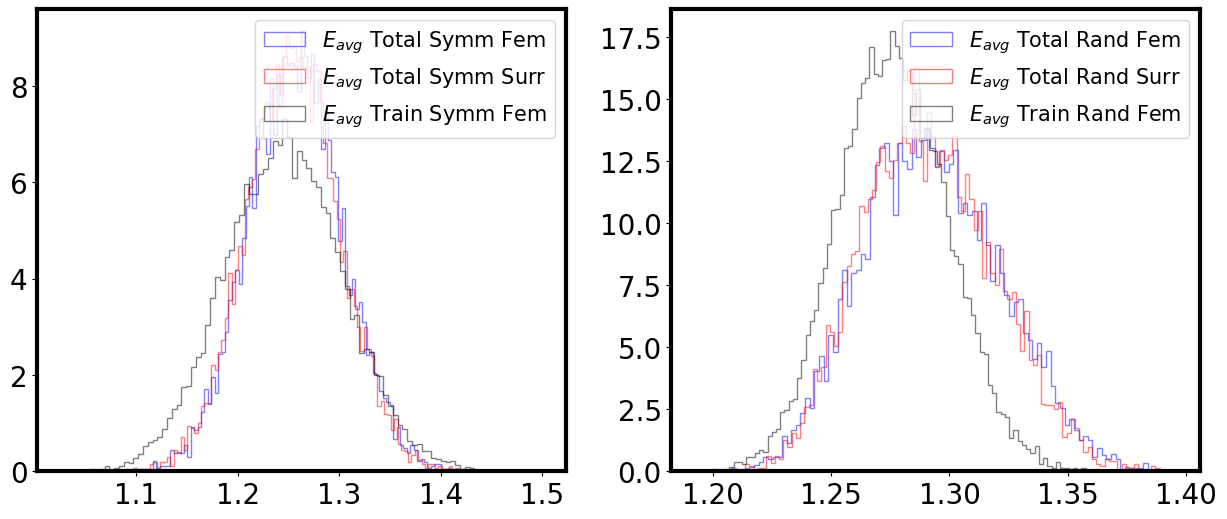

In [186]:
# moduli total gan avg

fig, ((ax4,ax5)) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))

moduli_avg_tg_s = (moduli_x_tg_s + moduli_y_tg_s + moduli_z_tg_s)/3
surr_modu_tg_s_avg = (surr_modu_tg_s_x + surr_modu_tg_s_y + surr_modu_tg_s_z)/3
moduli_avg = np.mean(moduli, axis = 1)
plt_avg_tg_s = ax4.hist(moduli_avg_tg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_tg_s[0])
plt_avg_tg_s_surr = ax4.hist(surr_modu_tg_s_avg.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_tg_s[1])
plt_avg_train_s = ax4.hist(moduli_avg.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Symm Fem')

ax4.legend(prop={'size': 15})
ax4.tick_params(labelsize=font_size)
ax4.spines[['left','right','bottom','top']].set_linewidth(3)


moduli_avg_tg_r = (moduli_x_tg_r + moduli_y_tg_r + moduli_z_tg_r)/3
surr_modu_tg_r_avg = (surr_modu_tg_r_x + surr_modu_tg_r_y + surr_modu_tg_r_z)/3
moduli_avg_non = np.mean(moduli_non, axis = 1)
plt_avg_tg_r = ax5.hist(moduli_avg_tg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_tg_r[0])
plt_avg_tg_r_surr = ax5.hist(surr_modu_tg_r_avg.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_tg_r[1])
plt_avg_train_r = ax5.hist(moduli_avg_non.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Rand Fem')

ax5.legend(prop={'size': 15})
ax5.tick_params(labelsize=font_size)
ax5.spines[['left','right','bottom','top']].set_linewidth(3)
plt.show()

In [28]:
print(moduli_avg_pg_s)

[1.21196566 1.22401842 1.11861277 ... 1.15358405 1.2516636  1.21602299]


In [50]:
print('','mean moduli of train symm by fem =', np.mean(moduli[:800]),'\n',
      'mean moduli of train random by fem =', np.mean(moduli_non[:800]),'\n',
      'mean moduli of pure gan symm by fem =', np.mean(moduli_x_pg_s),'\n',
      'mean moduli of pure gan random by fem =', np.mean(moduli_x_pg_r),'\n',
      'mean moduli of large gan symm by fem =', np.mean(moduli_x_lg_s),'\n',
      'mean moduli of large gan random by fem =', np.mean(moduli_x_lg_r),'\n',
      'mean moduli of symm gan symm by fem =', np.mean(moduli_x_sg_s),'\n',
      'mean moduli of symm gan random by fem =', np.mean(moduli_x_sg_r),'\n',)

 mean moduli of train symm by fem = 1.2464564710583332 
 mean moduli of train random by fem = 1.2766957006916666 
 mean moduli of pure gan symm by fem = 1.247791265075 
 mean moduli of pure gan random by fem = 1.2767616093125 
 mean moduli of large gan symm by fem = 1.2485575228499999 
 mean moduli of large gan random by fem = 1.275277929325 
 mean moduli of symm gan symm by fem = 1.246726718675 
 mean moduli of symm gan random by fem = 1.273078978225 



In [188]:
moduli_pg_s = np.hstack((moduli_x_pg_s.reshape(8000,1), 
                           moduli_y_pg_s.reshape(8000,1), 
                           moduli_z_pg_s.reshape(8000,1)))
moduli_pg_r = np.hstack((moduli_x_pg_r.reshape(8000,1), 
                           moduli_y_pg_r.reshape(8000,1), 
                           moduli_z_pg_r.reshape(8000,1)))
moduli_lg_s = np.hstack((moduli_x_lg_s.reshape(8000,1), 
                           moduli_y_lg_s.reshape(8000,1), 
                           moduli_z_lg_s.reshape(8000,1)))
moduli_lg_r = np.hstack((moduli_x_lg_r.reshape(8000,1), 
                           moduli_y_lg_r.reshape(8000,1), 
                           moduli_z_lg_r.reshape(8000,1)))
moduli_sg_s = np.hstack((moduli_x_sg_s.reshape(8000,1), 
                           moduli_y_sg_s.reshape(8000,1), 
                           moduli_z_sg_s.reshape(8000,1)))
moduli_sg_r = np.hstack((moduli_x_sg_r.reshape(8000,1), 
                           moduli_y_sg_r.reshape(8000,1), 
                           moduli_z_sg_r.reshape(8000,1)))
moduli_tg_s = np.hstack((moduli_x_tg_s.reshape(8000,1), 
                           moduli_y_tg_s.reshape(8000,1), 
                           moduli_z_tg_s.reshape(8000,1)))
moduli_tg_r = np.hstack((moduli_x_tg_r.reshape(8000,1), 
                           moduli_y_tg_r.reshape(8000,1), 
                           moduli_z_tg_r.reshape(8000,1)))
                           
moduli_good = np.hstack((moduli_x_good.reshape(3600,1), 
                           moduli_y_good.reshape(3600,1), 
                           moduli_z_good.reshape(3600,1)))
                           
surr_modu_pg_s = np.hstack((surr_modu_pg_s_x.reshape(8000,1), 
                           surr_modu_pg_s_y.reshape(8000,1), 
                           surr_modu_pg_s_z.reshape(8000,1)))
surr_modu_pg_r = np.hstack((surr_modu_pg_r_x.reshape(8000,1), 
                           surr_modu_pg_r_y.reshape(8000,1), 
                           surr_modu_pg_r_z.reshape(8000,1)))
surr_modu_lg_s = np.hstack((surr_modu_lg_s_x.reshape(8000,1), 
                           surr_modu_lg_s_y.reshape(8000,1), 
                           surr_modu_lg_s_z.reshape(8000,1)))
surr_modu_lg_r = np.hstack((surr_modu_lg_r_x.reshape(8000,1), 
                           surr_modu_lg_r_y.reshape(8000,1), 
                           surr_modu_lg_r_z.reshape(8000,1)))
surr_modu_sg_s = np.hstack((surr_modu_sg_s_x.reshape(8000,1), 
                           surr_modu_sg_s_y.reshape(8000,1), 
                           surr_modu_sg_s_z.reshape(8000,1)))
surr_modu_sg_r = np.hstack((surr_modu_sg_r_x.reshape(8000,1), 
                           surr_modu_sg_r_y.reshape(8000,1), 
                           surr_modu_sg_r_z.reshape(8000,1))) 
surr_modu_tg_s = np.hstack((surr_modu_tg_s_x.reshape(8000,1), 
                           surr_modu_tg_s_y.reshape(8000,1), 
                           surr_modu_tg_s_z.reshape(8000,1)))
surr_modu_tg_r = np.hstack((surr_modu_tg_r_x.reshape(8000,1), 
                           surr_modu_tg_r_y.reshape(8000,1), 
                           surr_modu_tg_r_z.reshape(8000,1)))

modu_good_l_lg_r = np.hstack((modu_good_l_lg_r_x.reshape(300,1), 
                           modu_good_l_lg_r_y.reshape(300,1), 
                           modu_good_l_lg_r_z.reshape(300,1)))
modu_good_l_lg_s = np.hstack((modu_good_l_lg_s_x.reshape(300,1), 
                           modu_good_l_lg_s_y.reshape(300,1), 
                           modu_good_l_lg_s_z.reshape(300,1)))
modu_good_l_pg_r = np.hstack((modu_good_l_pg_r_x.reshape(300,1), 
                           modu_good_l_pg_r_y.reshape(300,1), 
                           modu_good_l_pg_r_z.reshape(300,1)))
modu_good_l_pg_s = np.hstack((modu_good_l_pg_s_x.reshape(300,1), 
                           modu_good_l_pg_s_y.reshape(300,1), 
                           modu_good_l_pg_s_z.reshape(300,1)))
modu_good_l_tg_r = np.hstack((modu_good_l_tg_r_x.reshape(300,1), 
                           modu_good_l_tg_r_y.reshape(300,1), 
                           modu_good_l_tg_r_z.reshape(300,1)))
modu_good_l_tg_s = np.hstack((modu_good_l_tg_s_x.reshape(300,1), 
                           modu_good_l_tg_s_y.reshape(300,1), 
                           modu_good_l_tg_s_z.reshape(300,1)))
modu_good_s_pg_r = np.hstack((modu_good_s_pg_r_x.reshape(300,1), 
                           modu_good_s_pg_r_y.reshape(300,1), 
                           modu_good_s_pg_r_z.reshape(300,1)))
modu_good_s_pg_s = np.hstack((modu_good_s_pg_s_x.reshape(300,1), 
                           modu_good_s_pg_s_y.reshape(300,1), 
                           modu_good_s_pg_s_z.reshape(300,1)))
modu_good_s_sg_r = np.hstack((modu_good_s_sg_r_x.reshape(300,1), 
                           modu_good_s_sg_r_y.reshape(300,1), 
                           modu_good_s_sg_r_z.reshape(300,1)))
modu_good_s_sg_s = np.hstack((modu_good_s_sg_s_x.reshape(300,1), 
                           modu_good_s_sg_s_y.reshape(300,1), 
                           modu_good_s_sg_s_z.reshape(300,1)))
modu_good_s_tg_r = np.hstack((modu_good_s_tg_r_x.reshape(300,1), 
                           modu_good_s_tg_r_y.reshape(300,1), 
                           modu_good_s_tg_r_z.reshape(300,1)))
modu_good_s_tg_s = np.hstack((modu_good_s_tg_s_x.reshape(300,1), 
                           modu_good_s_tg_s_y.reshape(300,1), 
                           modu_good_s_tg_s_z.reshape(300,1)))




In [193]:
iso_surr_pg_s.shape

(8000,)

In [192]:
iso_pg_s = np.std(moduli_pg_s, axis = 1)
iso_pg_r = np.std(moduli_pg_r, axis = 1)
iso_lg_s = np.std(moduli_lg_s, axis = 1)
iso_lg_r = np.std(moduli_lg_r, axis = 1)
iso_sg_s = np.std(moduli_sg_s, axis = 1)
iso_sg_r = np.std(moduli_sg_r, axis = 1)
iso_tg_s = np.std(moduli_tg_s, axis = 1)
iso_tg_r = np.std(moduli_tg_r, axis = 1)

iso_surr_pg_s = np.std(surr_modu_pg_s, axis = 1)
iso_surr_pg_r = np.std(surr_modu_pg_r, axis = 1)
iso_surr_lg_s = np.std(surr_modu_lg_s, axis = 1)
iso_surr_lg_r = np.std(surr_modu_lg_r, axis = 1)
iso_surr_sg_s = np.std(surr_modu_sg_s, axis = 1)
iso_surr_sg_r = np.std(surr_modu_sg_r, axis = 1)
iso_surr_tg_s = np.std(surr_modu_tg_s, axis = 1)
iso_surr_tg_r = np.std(surr_modu_tg_r, axis = 1)

iso_good_l_lg_r = np.std(modu_good_l_lg_r, axis = 1)
iso_good_l_lg_s = np.std(modu_good_l_lg_s, axis = 1)
iso_good_l_pg_r = np.std(modu_good_l_pg_r, axis = 1)
iso_good_l_pg_s = np.std(modu_good_l_pg_s, axis = 1)
iso_good_l_tg_r = np.std(modu_good_l_tg_r, axis = 1)
iso_good_l_tg_s = np.std(modu_good_l_tg_s, axis = 1)
iso_good_s_pg_r = np.std(modu_good_s_pg_r, axis = 1)
iso_good_s_pg_s = np.std(modu_good_s_pg_s, axis = 1)
iso_good_s_sg_r = np.std(modu_good_s_sg_r, axis = 1)
iso_good_s_sg_s = np.std(modu_good_s_sg_s, axis = 1)
iso_good_s_tg_r = np.std(modu_good_s_tg_r, axis = 1)
iso_good_s_tg_s = np.std(modu_good_s_tg_s, axis = 1)

iso_surr_good_l_lg_r = np.std(surr_modu_good_l_lg_r, axis = 1)
iso_surr_good_l_lg_s = np.std(surr_modu_good_l_lg_s, axis = 1)
iso_surr_good_l_pg_r = np.std(surr_modu_good_l_pg_r, axis = 1)
iso_surr_good_l_pg_s = np.std(surr_modu_good_l_pg_s, axis = 1)
iso_surr_good_l_tg_r = np.std(surr_modu_good_l_tg_r, axis = 1)
iso_surr_good_l_tg_s = np.std(surr_modu_good_l_tg_s, axis = 1)
iso_surr_good_s_pg_r = np.std(surr_modu_good_s_pg_r, axis = 1)
iso_surr_good_s_pg_s = np.std(surr_modu_good_s_pg_s, axis = 1)
iso_surr_good_s_sg_r = np.std(surr_modu_good_s_sg_r, axis = 1)
iso_surr_good_s_sg_s = np.std(surr_modu_good_s_sg_s, axis = 1)
iso_surr_good_s_tg_r = np.std(surr_modu_good_s_tg_r, axis = 1)
iso_surr_good_s_tg_s = np.std(surr_modu_good_s_tg_s, axis = 1)

iso_trn_s = np.std(moduli, axis = 1)
iso_trn_r = np.std(moduli_non, axis = 1)

In [135]:
print('','isotropy of train symm =', np.mean(iso_pg_s[:800]),'\n',
      'isotropy of train random =', np.mean(iso_trn_r[:800]),'\n',
      'isotropy of pure gan symm =', np.mean(iso_pg_s),'\n',
      'isotropy of pure gan random =', np.mean(iso_pg_r),'\n',
      'isotropy of large gan symm =', np.mean(iso_lg_s),'\n',
      'isotropy of large gan random =', np.mean(iso_lg_r),'\n',
      'isotropy of symm gan symm =', np.mean(iso_sg_s),'\n',
      'isotropy of symm gan random =', np.mean(iso_sg_r),'\n',)


 isotropy of train symm = 0.11355275553425954 
 isotropy of train random = 0.039015501513568765 
 isotropy of pure gan symm = 0.11561639359173578 
 isotropy of pure gan random = 0.03826056674717722 
 isotropy of large gan symm = 0.11536603891872593 
 isotropy of large gan random = 0.0494922532588163 
 isotropy of symm gan symm = 0.07491385433536225 
 isotropy of symm gan random = 0.03626414043020514 



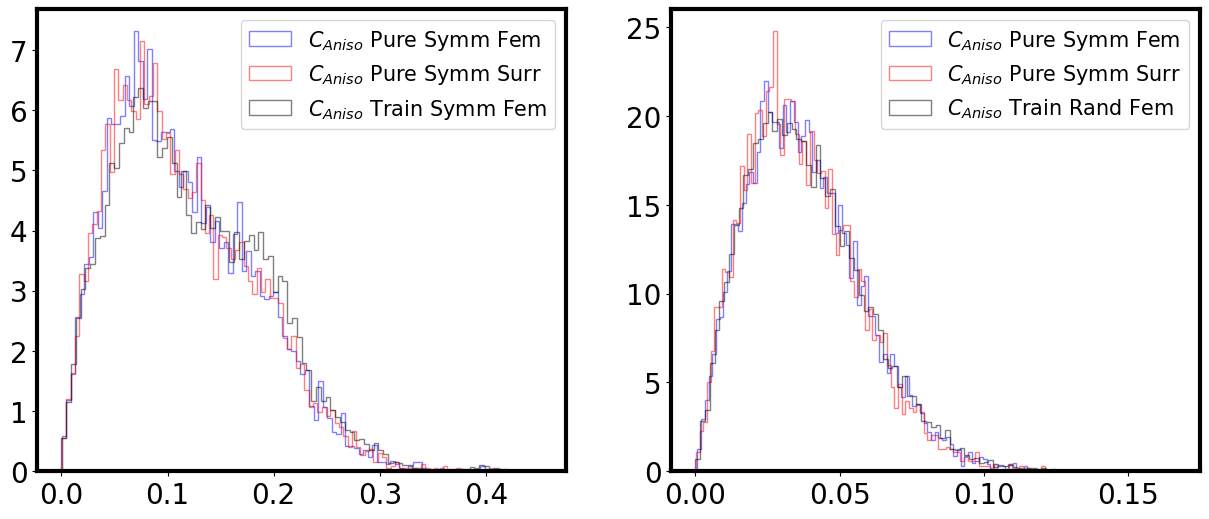

In [194]:
# Isotropy pure gan

fig, ((ax8, ax9)) = plt.subplots(nrows = 1, ncols =2, figsize=(15,6))
plt_iso_pg_s = ax8.hist(iso_pg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_pg_s[0])
plt_iso_pg_s_surr = ax8.hist(iso_surr_pg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_pg_s[1])
plt_iso_train_s = ax8.hist(iso_trn_s.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')

ax8.legend(prop={'size': 15})
ax8.tick_params(labelsize=font_size)
ax8.spines[['left','right','bottom','top']].set_linewidth(3)

plt_iso_pg_r = ax9.hist(iso_pg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_pg_s[0])
plt_iso_pg_r_surr = ax9.hist(iso_surr_pg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_pg_s[1])
plt_iso_train_r = ax9.hist(iso_trn_r.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Rand Fem')

ax9.legend(prop={'size': 15})
ax9.tick_params(labelsize=font_size)
ax9.spines[['left','right','bottom','top']].set_linewidth(3)


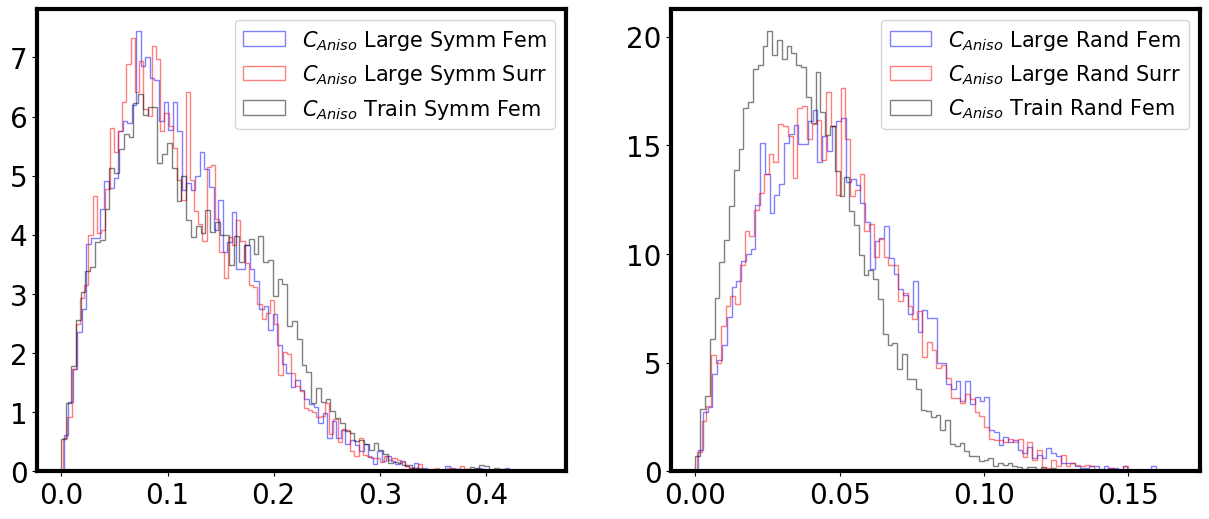

In [195]:
# Isotropy large gan

fig, ((ax8, ax9)) = plt.subplots(nrows = 1, ncols =2, figsize=(15,6))
plt_iso_lg_s = ax8.hist(iso_lg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_lg_s[0])
plt_iso_lg_s_surr = ax8.hist(iso_surr_lg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_lg_s[1])
plt_iso_train_s = ax8.hist(iso_trn_s.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')

ax8.legend(prop={'size': 15})
ax8.tick_params(labelsize=font_size)
ax8.spines[['left','right','bottom','top']].set_linewidth(3)

plt_iso_lg_r = ax9.hist(iso_lg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_lg_r[0])
plt_iso_lg_r_surr = ax9.hist(iso_surr_lg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_lg_r[1])
plt_iso_train_r = ax9.hist(iso_trn_r.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Rand Fem')

ax9.legend(prop={'size': 15})
ax9.tick_params(labelsize=font_size)
ax9.spines[['left','right','bottom','top']].set_linewidth(3)

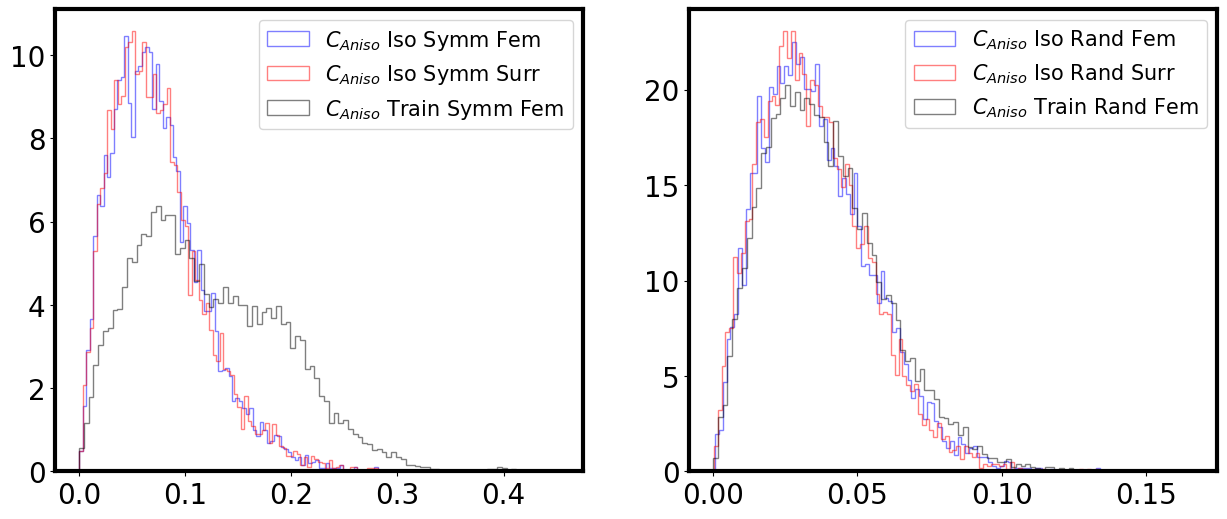

In [196]:
# Isotropy symm gan

fig, ((ax8, ax9)) = plt.subplots(nrows = 1, ncols =2, figsize=(15,6))
plt_iso_sg_s = ax8.hist(iso_sg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_sg_s[0])
plt_iso_sg_s_surr = ax8.hist(iso_surr_sg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_sg_s[1])
plt_iso_train_s = ax8.hist(iso_trn_s.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')

ax8.legend(prop={'size': 15})
ax8.tick_params(labelsize=font_size)
ax8.spines[['left','right','bottom','top']].set_linewidth(3)

plt_iso_sg_r = ax9.hist(iso_sg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_sg_r[0])
plt_iso_sg_r_surr = ax9.hist(iso_surr_sg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_sg_r[1])
plt_iso_train_r = ax9.hist(iso_trn_r.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Rand Fem')

ax9.legend(prop={'size': 15})
ax9.tick_params(labelsize=font_size)
ax9.spines[['left','right','bottom','top']].set_linewidth(3)

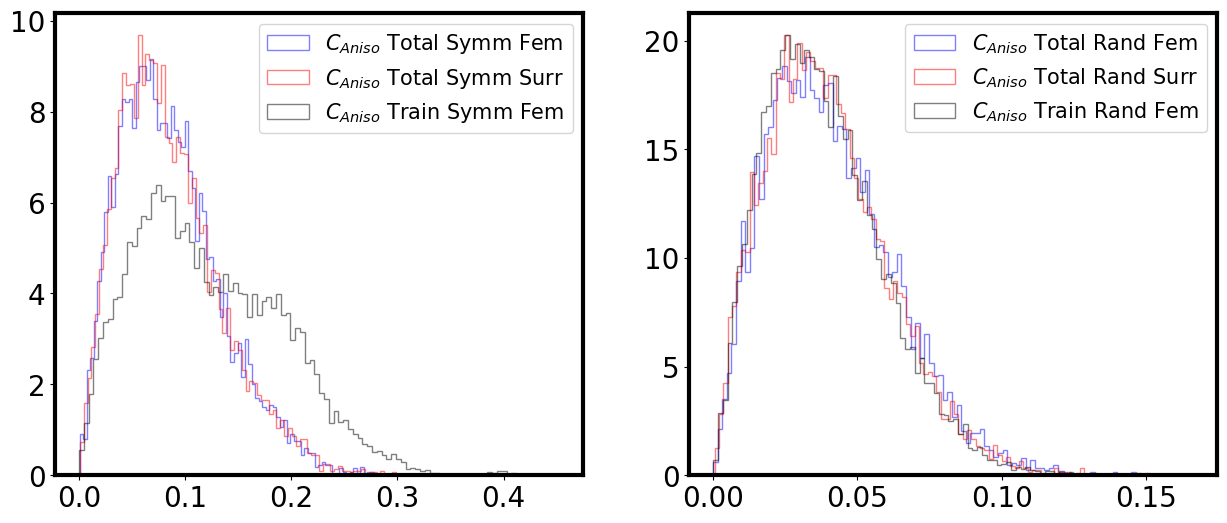

In [139]:
# Isotropy total gan

fig, ((ax8, ax9)) = plt.subplots(nrows = 1, ncols =2, figsize=(15,6))
plt_iso_tg_s = ax8.hist(iso_tg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_tg_s[0])
plt_iso_tg_s_surr = ax8.hist(iso_surr_tg_s.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_tg_s[1])
plt_iso_train_s = ax8.hist(iso_trn_s.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')

ax8.legend(prop={'size': 15})
ax8.tick_params(labelsize=font_size)
ax8.spines[['left','right','bottom','top']].set_linewidth(3)

plt_iso_tg_r = ax9.hist(iso_tg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_tg_r[0])
plt_iso_tg_r_surr = ax9.hist(iso_surr_tg_r.reshape(8000,1), bins = 100, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_tg_r[1])
plt_iso_train_r = ax9.hist(iso_trn_r.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Rand Fem')

ax9.legend(prop={'size': 15})
ax9.tick_params(labelsize=font_size)
ax9.spines[['left','right','bottom','top']].set_linewidth(3)

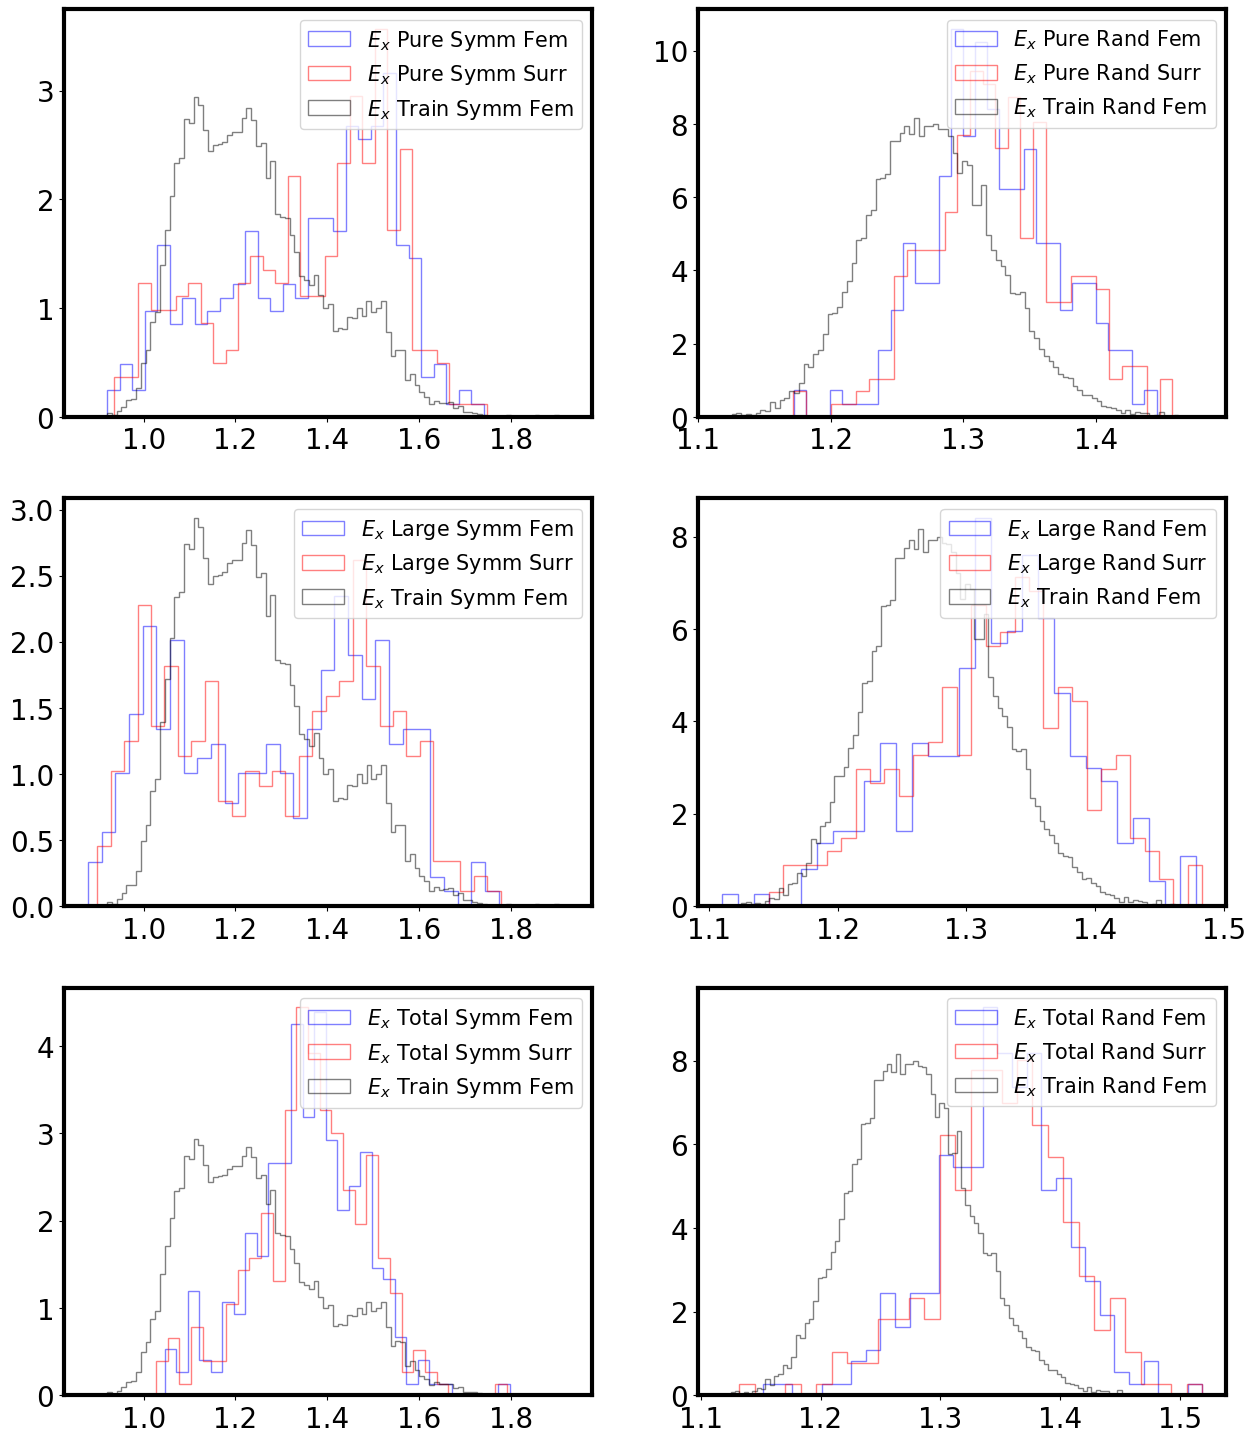

In [197]:
# moduli good large x
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows = 3, ncols =2, figsize=(15,18))
# large pure symm
plt_modu_pg_s = ax0.hist(modu_good_l_pg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_pg_s[0])
plt_modu_pg_s_surr = ax0.hist(surr_modu_good_l_pg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_pg_s[1])
plt_modu_train_s = ax0.hist(moduli[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Symm Fem')
ax0.legend(prop={'size': 15})
ax0.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)
# large pure rand
plt_modu_pg_r = ax1.hist(modu_good_l_pg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_pg_r[0])
plt_modu_pg_r_surr = ax1.hist(surr_modu_good_l_pg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_pg_r[1])
plt_modu_train_s = ax1.hist(moduli_non[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Rand Fem')
ax1.legend(prop={'size': 15})
ax1.tick_params(labelsize=font_size)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)
# large large symm
plt_modu_lg_s = ax2.hist(modu_good_l_lg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_lg_s[0])
plt_modu_lg_s_surr = ax2.hist(surr_modu_good_l_lg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_lg_s[1])
plt_modu_train_s = ax2.hist(moduli[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Symm Fem')
ax2.legend(prop={'size': 15})
ax2.tick_params(labelsize=font_size)
ax2.spines[['left','right','bottom','top']].set_linewidth(3)
# large large rand
plt_modu_lg_r = ax3.hist(modu_good_l_lg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_lg_r[0])
plt_modu_lg_r_surr = ax3.hist(surr_modu_good_l_lg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_lg_r[1])
plt_modu_train_s = ax3.hist(moduli_non[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Rand Fem')
ax3.legend(prop={'size': 15})
ax3.tick_params(labelsize=font_size)
ax3.spines[['left','right','bottom','top']].set_linewidth(3)
# large total symm
plt_modu_tg_s = ax4.hist(modu_good_l_tg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_tg_s[0])
plt_modu_tg_s_surr = ax4.hist(surr_modu_good_l_tg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_tg_s[1])
plt_modu_train_s = ax4.hist(moduli[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Symm Fem')
ax4.legend(prop={'size': 15})
ax4.tick_params(labelsize=font_size)
ax4.spines[['left','right','bottom','top']].set_linewidth(3)
# large total rand
plt_modu_tg_r = ax5.hist(modu_good_l_tg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_tg_r[0])
plt_modu_tg_r_surr = ax5.hist(surr_modu_good_l_tg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_tg_r[1])
plt_modu_train_s = ax5.hist(moduli_non[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Rand Fem')
ax5.legend(prop={'size': 15})
ax5.tick_params(labelsize=font_size)
ax5.spines[['left','right','bottom','top']].set_linewidth(3)



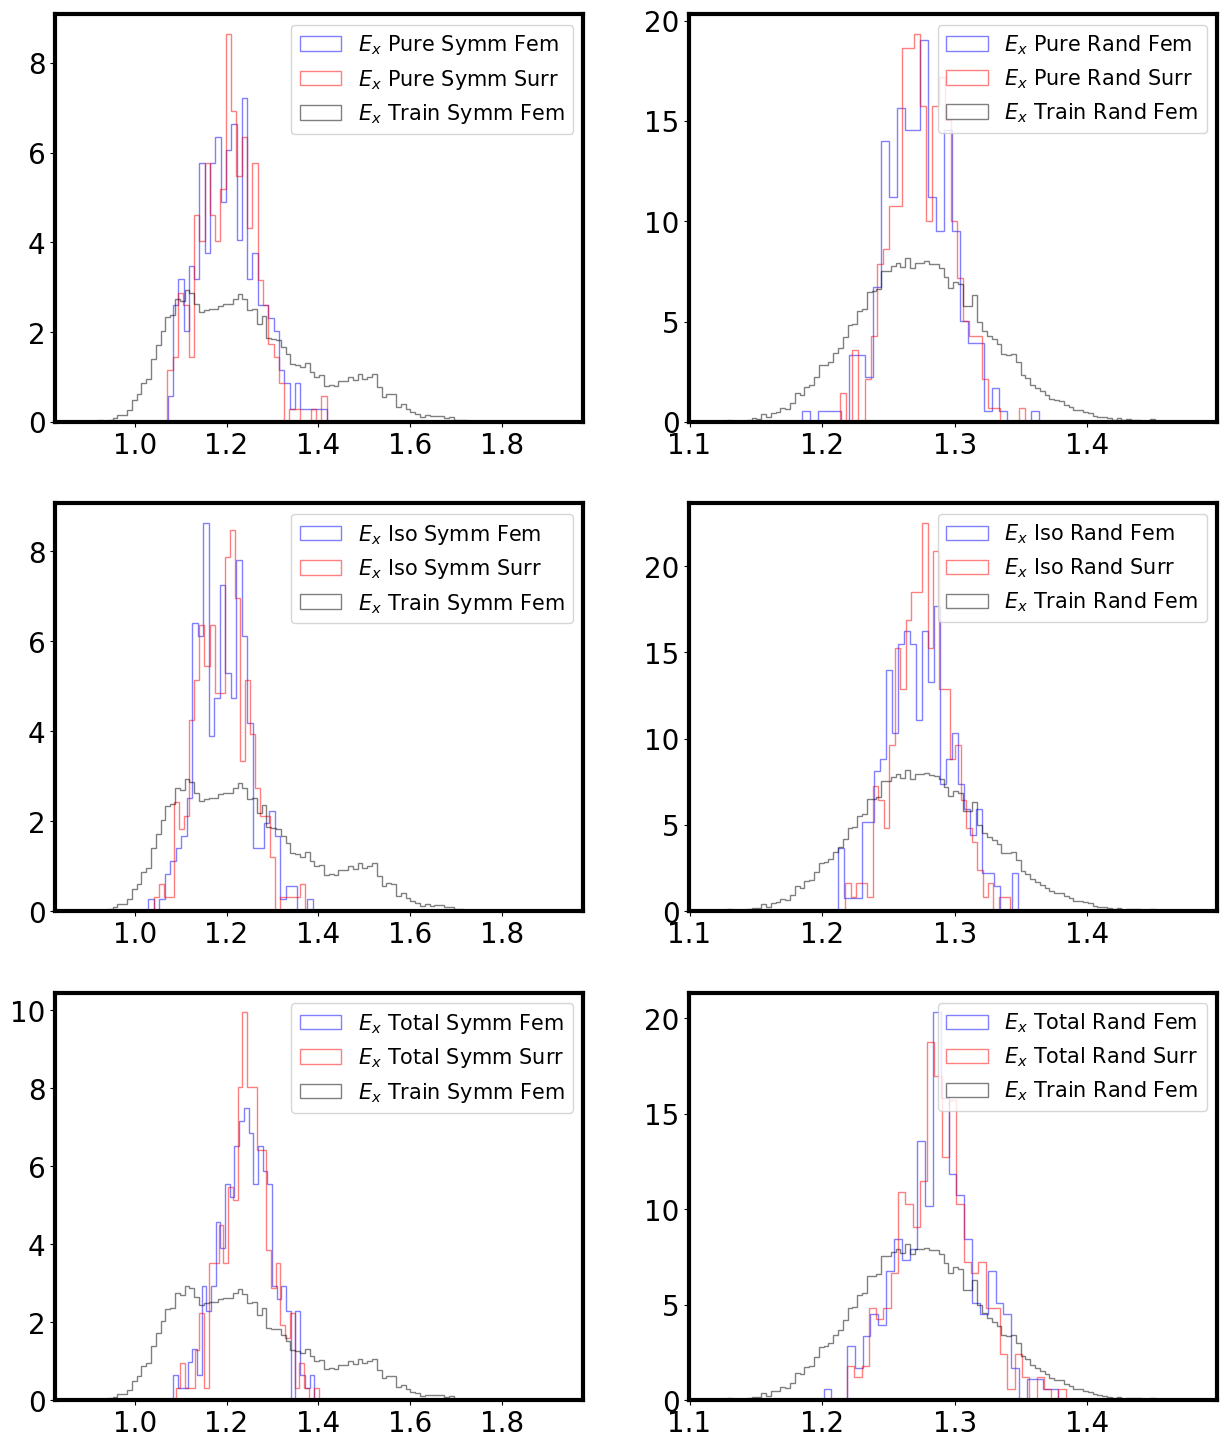

In [170]:
# moduli good iso x
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows = 3, ncols =2, figsize=(15,18))
# large pure symm
plt_modu_pg_s = ax0.hist(modu_good_s_pg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_pg_s[0])
plt_modu_pg_s_surr = ax0.hist(surr_modu_good_s_pg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_pg_s[1])
plt_modu_train_s = ax0.hist(moduli[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Symm Fem')
ax0.legend(prop={'size': 15})
ax0.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)
# large pure rand
plt_modu_pg_r = ax1.hist(modu_good_s_pg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_pg_r[0])
plt_modu_pg_r_surr = ax1.hist(surr_modu_good_s_pg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_pg_r[1])
plt_modu_train_s = ax1.hist(moduli_non[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Rand Fem')
ax1.legend(prop={'size': 15})
ax1.tick_params(labelsize=font_size)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)
# large iso symm
plt_modu_lg_s = ax2.hist(modu_good_s_sg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_sg_s[0])
plt_modu_lg_s_surr = ax2.hist(surr_modu_good_s_sg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_sg_s[1])
plt_modu_train_s = ax2.hist(moduli[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Symm Fem')
ax2.legend(prop={'size': 15})
ax2.tick_params(labelsize=font_size)
ax2.spines[['left','right','bottom','top']].set_linewidth(3)
# large iso rand
plt_modu_lg_r = ax3.hist(modu_good_s_sg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_sg_r[0])
plt_modu_lg_r_surr = ax3.hist(surr_modu_good_s_sg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_sg_r[1])
plt_modu_train_s = ax3.hist(moduli_non[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Rand Fem')
ax3.legend(prop={'size': 15})
ax3.tick_params(labelsize=font_size)
ax3.spines[['left','right','bottom','top']].set_linewidth(3)
# large total symm
plt_modu_tg_s = ax4.hist(modu_good_s_tg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_tg_s[0])
plt_modu_tg_s_surr = ax4.hist(surr_modu_good_s_tg_s_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_tg_s[1])
plt_modu_train_s = ax4.hist(moduli[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Symm Fem')
ax4.legend(prop={'size': 15})
ax4.tick_params(labelsize=font_size)
ax4.spines[['left','right','bottom','top']].set_linewidth(3)
# large total rand
plt_modu_tg_r = ax5.hist(modu_good_s_tg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{x}$ ' + labels_tg_r[0])
plt_modu_tg_r_surr = ax5.hist(surr_modu_good_s_tg_r_x.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{x}$ ' + labels_tg_r[1])
plt_modu_train_s = ax5.hist(moduli_non[:,0].reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{x}$ ' + 'Train Rand Fem')
ax5.legend(prop={'size': 15})
ax5.tick_params(labelsize=font_size)
ax5.spines[['left','right','bottom','top']].set_linewidth(3)

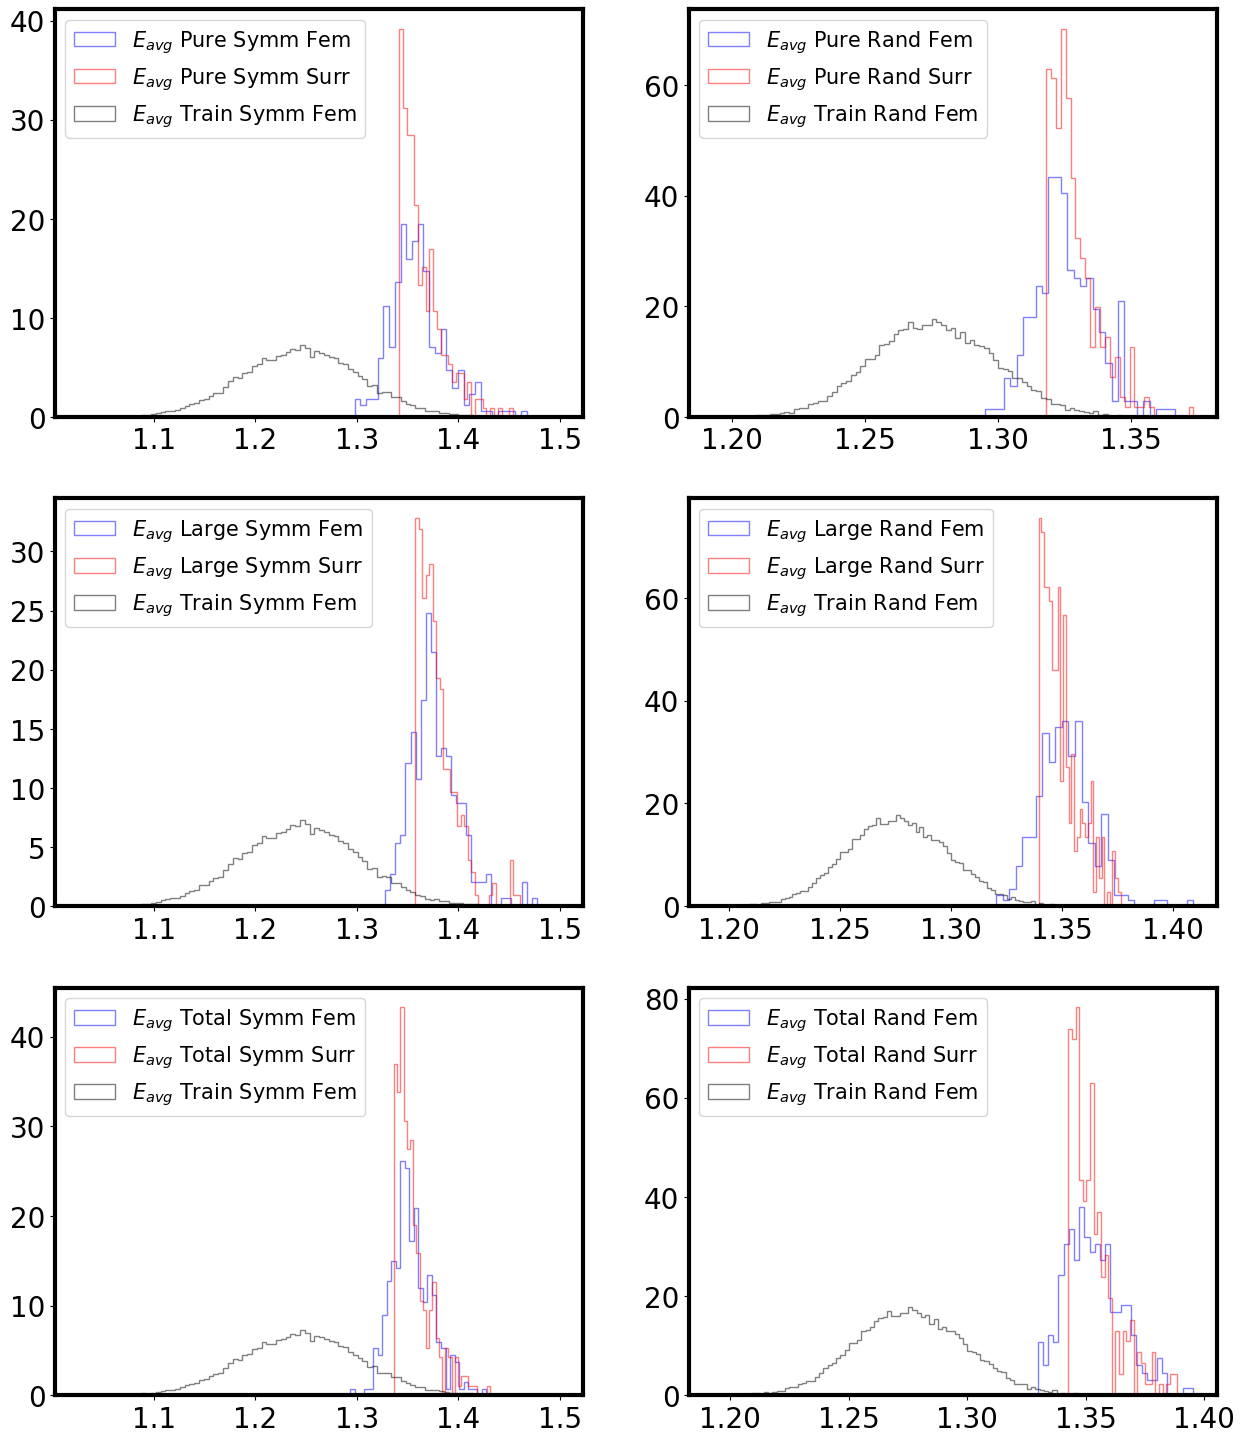

In [175]:
# moduli good large avg
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows = 3, ncols =2, figsize=(15,18))
# large pure symm
modu_good_l_pg_s_avg = (modu_good_l_pg_s_x + modu_good_l_pg_s_y + modu_good_l_pg_s_z)/3
surr_modu_good_l_pg_s_avg = (surr_modu_good_l_pg_s_x + surr_modu_good_l_pg_s_y + surr_modu_good_l_pg_s_z)/3
plt_modu_pg_s = ax0.hist(modu_good_l_pg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_pg_s[0])
plt_modu_pg_s_surr = ax0.hist(surr_modu_good_l_pg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_pg_s[1])
plt_modu_train_s = ax0.hist(moduli_avg.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Symm Fem')
ax0.legend(prop={'size': 15})
ax0.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)
# large pure rand
modu_good_l_pg_r_avg = (modu_good_l_pg_r_x + modu_good_l_pg_r_y + modu_good_l_pg_r_z)/3
surr_modu_good_l_pg_r_avg = (surr_modu_good_l_pg_r_x + surr_modu_good_l_pg_r_y + surr_modu_good_l_pg_r_z)/3
plt_modu_pg_r = ax1.hist(modu_good_l_pg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_pg_r[0])
plt_modu_pg_r_surr = ax1.hist(surr_modu_good_l_pg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_pg_r[1])
plt_modu_train_s = ax1.hist(moduli_avg_non.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Rand Fem')
ax1.legend(prop={'size': 15})
ax1.tick_params(labelsize=font_size)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)
# large large symm
modu_good_l_lg_s_avg = (modu_good_l_lg_s_x + modu_good_l_lg_s_y + modu_good_l_lg_s_z)/3
surr_modu_good_l_lg_s_avg = (surr_modu_good_l_lg_s_x + surr_modu_good_l_lg_s_y + surr_modu_good_l_lg_s_z)/3
plt_modu_lg_s = ax2.hist(modu_good_l_lg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_lg_s[0])
plt_modu_lg_s_surr = ax2.hist(surr_modu_good_l_lg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_lg_s[1])
plt_modu_train_s = ax2.hist(moduli_avg.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Symm Fem')
ax2.legend(prop={'size': 15})
ax2.tick_params(labelsize=font_size)
ax2.spines[['left','right','bottom','top']].set_linewidth(3)
# large large rand
modu_good_l_lg_r_avg = (modu_good_l_lg_r_x + modu_good_l_lg_r_y + modu_good_l_lg_r_z)/3
surr_modu_good_l_lg_r_avg = (surr_modu_good_l_lg_r_x + surr_modu_good_l_lg_r_y + surr_modu_good_l_lg_r_z)/3
plt_modu_lg_r = ax3.hist(modu_good_l_lg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_lg_r[0])
plt_modu_lg_r_surr = ax3.hist(surr_modu_good_l_lg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_lg_r[1])
plt_modu_train_s = ax3.hist(moduli_avg_non.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Rand Fem')
ax3.legend(prop={'size': 15})
ax3.tick_params(labelsize=font_size)
ax3.spines[['left','right','bottom','top']].set_linewidth(3)
# large total symm
modu_good_l_tg_s_avg = (modu_good_l_tg_s_x + modu_good_l_tg_s_y + modu_good_l_tg_s_z)/3
surr_modu_good_l_tg_s_avg = (surr_modu_good_l_tg_s_x + surr_modu_good_l_tg_s_y + surr_modu_good_l_tg_s_z)/3
plt_modu_tg_s = ax4.hist(modu_good_l_tg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_tg_s[0])
plt_modu_tg_s_surr = ax4.hist(surr_modu_good_l_tg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_tg_s[1])
plt_modu_train_s = ax4.hist(moduli_avg.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Symm Fem')
ax4.legend(prop={'size': 15})
ax4.tick_params(labelsize=font_size)
ax4.spines[['left','right','bottom','top']].set_linewidth(3)
# large total rand
modu_good_l_tg_r_avg = (modu_good_l_tg_r_x + modu_good_l_tg_r_y + modu_good_l_tg_r_z)/3
surr_modu_good_l_tg_r_avg = (surr_modu_good_l_tg_r_x + surr_modu_good_l_tg_r_y + surr_modu_good_l_tg_r_z)/3
plt_modu_tg_r = ax5.hist(modu_good_l_tg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_tg_r[0])
plt_modu_tg_r_surr = ax5.hist(surr_modu_good_l_tg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_tg_r[1])
plt_modu_train_s = ax5.hist(moduli_avg_non.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Rand Fem')
ax5.legend(prop={'size': 15})
ax5.tick_params(labelsize=font_size)
ax5.spines[['left','right','bottom','top']].set_linewidth(3)

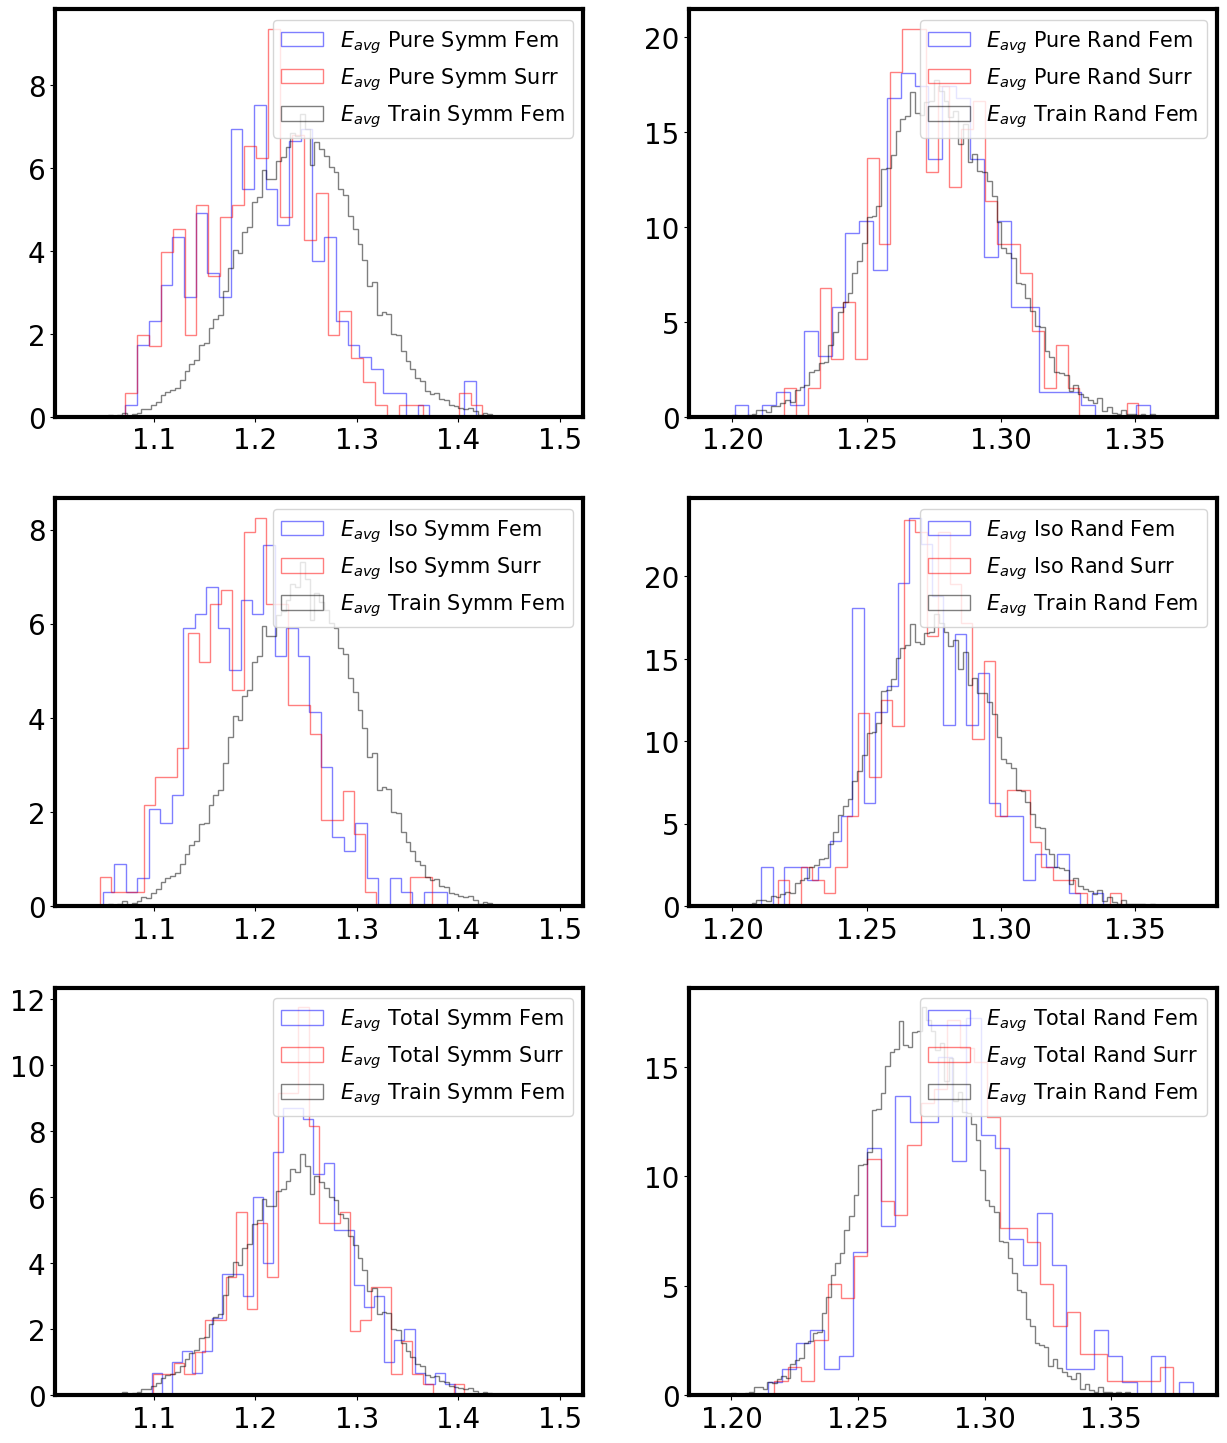

In [198]:
# moduli good iso avg
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows = 3, ncols =2, figsize=(15,18))
# large pure symm
modu_good_s_pg_s_avg = (modu_good_s_pg_s_x + modu_good_s_pg_s_y + modu_good_s_pg_s_z)/3
surr_modu_good_s_pg_s_avg = (surr_modu_good_s_pg_s_x + surr_modu_good_s_pg_s_y + surr_modu_good_s_pg_s_z)/3
plt_modu_pg_s = ax0.hist(modu_good_s_pg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_pg_s[0])
plt_modu_pg_s_surr = ax0.hist(surr_modu_good_s_pg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_pg_s[1])
plt_modu_train_s = ax0.hist(moduli_avg.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Symm Fem')
ax0.legend(prop={'size': 15})
ax0.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)
# large pure rand
modu_good_s_pg_r_avg = (modu_good_s_pg_r_x + modu_good_s_pg_r_y + modu_good_s_pg_r_z)/3
surr_modu_good_s_pg_r_avg = (surr_modu_good_s_pg_r_x + surr_modu_good_s_pg_r_y + surr_modu_good_s_pg_r_z)/3
plt_modu_pg_r = ax1.hist(modu_good_s_pg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_pg_r[0])
plt_modu_pg_r_surr = ax1.hist(surr_modu_good_s_pg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_pg_r[1])
plt_modu_train_s = ax1.hist(moduli_avg_non.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Rand Fem')
ax1.legend(prop={'size': 15})
ax1.tick_params(labelsize=font_size)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)
# large iso symm
modu_good_s_sg_s_avg = (modu_good_s_sg_s_x + modu_good_s_sg_s_y + modu_good_s_sg_s_z)/3
surr_modu_good_s_sg_s_avg = (surr_modu_good_s_sg_s_x + surr_modu_good_s_sg_s_y + surr_modu_good_s_sg_s_z)/3
plt_modu_lg_s = ax2.hist(modu_good_s_sg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_sg_s[0])
plt_modu_lg_s_surr = ax2.hist(surr_modu_good_s_sg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_sg_s[1])
plt_modu_train_s = ax2.hist(moduli_avg.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Symm Fem')
ax2.legend(prop={'size': 15})
ax2.tick_params(labelsize=font_size)
ax2.spines[['left','right','bottom','top']].set_linewidth(3)
# large iso rand
modu_good_s_sg_r_avg = (modu_good_s_sg_r_x + modu_good_s_sg_r_y + modu_good_s_sg_r_z)/3
surr_modu_good_s_sg_r_avg = (surr_modu_good_s_sg_r_x + surr_modu_good_s_sg_r_y + surr_modu_good_s_sg_r_z)/3
plt_modu_lg_r = ax3.hist(modu_good_s_sg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_sg_r[0])
plt_modu_lg_r_surr = ax3.hist(surr_modu_good_s_sg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_sg_r[1])
plt_modu_train_s = ax3.hist(moduli_avg_non.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Rand Fem')
ax3.legend(prop={'size': 15})
ax3.tick_params(labelsize=font_size)
ax3.spines[['left','right','bottom','top']].set_linewidth(3)
# large total symm
modu_good_s_tg_s_avg = (modu_good_s_tg_s_x + modu_good_s_tg_s_y + modu_good_s_tg_s_z)/3
surr_modu_good_s_tg_s_avg = (surr_modu_good_s_tg_s_x + surr_modu_good_s_tg_s_y + surr_modu_good_s_tg_s_z)/3
plt_modu_tg_s = ax4.hist(modu_good_s_tg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_tg_s[0])
plt_modu_tg_s_surr = ax4.hist(surr_modu_good_s_tg_s_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_tg_s[1])
plt_modu_train_s = ax4.hist(moduli_avg.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Symm Fem')
ax4.legend(prop={'size': 15})
ax4.tick_params(labelsize=font_size)
ax4.spines[['left','right','bottom','top']].set_linewidth(3)
# large total rand
modu_good_s_tg_r_avg = (modu_good_s_tg_r_x + modu_good_s_tg_r_y + modu_good_s_tg_r_z)/3
surr_modu_good_s_tg_r_avg = (surr_modu_good_s_tg_r_x + surr_modu_good_s_tg_r_y + surr_modu_good_s_tg_r_z)/3
plt_modu_tg_r = ax5.hist(modu_good_s_tg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$E_{avg}$ ' + labels_tg_r[0])
plt_modu_tg_r_surr = ax5.hist(surr_modu_good_s_tg_r_avg.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$E_{avg}$ ' + labels_tg_r[1])
plt_modu_train_s = ax5.hist(moduli_avg_non.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$E_{avg}$ ' + 'Train Rand Fem')
ax5.legend(prop={'size': 15})
ax5.tick_params(labelsize=font_size)
ax5.spines[['left','right','bottom','top']].set_linewidth(3)

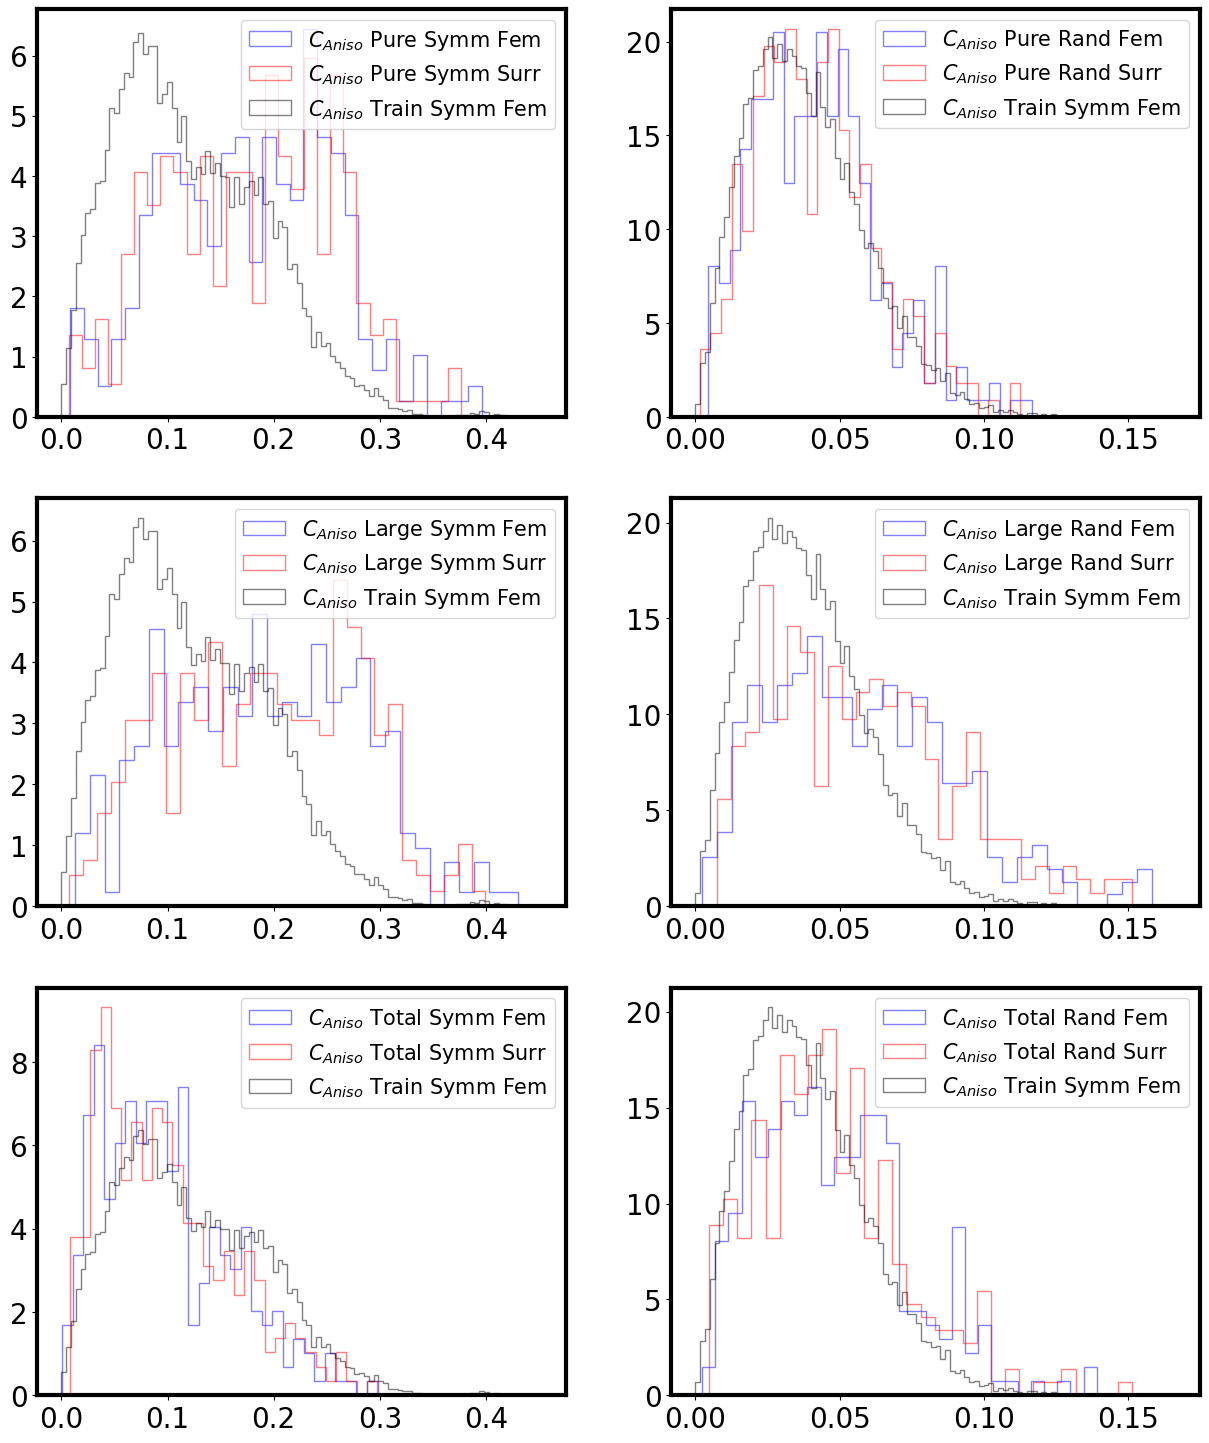

In [181]:
# C_aniso good large
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows = 3, ncols =2, figsize=(15,18))
# large pure symm
plt_iso_pg_s = ax0.hist(iso_good_l_pg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_pg_s[0])
plt_iso_pg_s_surr = ax0.hist(iso_surr_good_l_pg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_pg_s[1])
plt_iso_train_s = ax0.hist(iso_trn_s.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax0.legend(prop={'size': 15})
ax0.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)
# large pure rand
plt_iso_pg_r = ax1.hist(iso_good_l_pg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_pg_r[0])
plt_iso_pg_r_surr = ax1.hist(iso_surr_good_l_pg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_pg_r[1])
plt_iso_train_s = ax1.hist(iso_trn_r.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax1.legend(prop={'size': 15})
ax1.tick_params(labelsize=font_size)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)
# large large symm
plt_iso_lg_s = ax2.hist(iso_good_l_lg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_lg_s[0])
plt_iso_lg_s_surr = ax2.hist(iso_surr_good_l_lg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_lg_s[1])
plt_iso_train_s = ax2.hist(iso_trn_s.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax2.legend(prop={'size': 15})
ax2.tick_params(labelsize=font_size)
ax2.spines[['left','right','bottom','top']].set_linewidth(3)
# large large rand
plt_iso_lg_r = ax3.hist(iso_good_l_lg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_lg_r[0])
plt_iso_lg_r_surr = ax3.hist(iso_surr_good_l_lg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_lg_r[1])
plt_iso_train_s = ax3.hist(iso_trn_r.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax3.legend(prop={'size': 15})
ax3.tick_params(labelsize=font_size)
ax3.spines[['left','right','bottom','top']].set_linewidth(3)
# large total symm
plt_iso_tg_s = ax4.hist(iso_good_l_tg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_tg_s[0])
plt_iso_tg_s_surr = ax4.hist(iso_surr_good_l_tg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_tg_s[1])
plt_iso_train_s = ax4.hist(iso_trn_s.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax4.legend(prop={'size': 15})
ax4.tick_params(labelsize=font_size)
ax4.spines[['left','right','bottom','top']].set_linewidth(3)
# large total rand
plt_iso_tg_r = ax5.hist(iso_good_l_tg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_tg_r[0])
plt_iso_tg_r_surr = ax5.hist(iso_surr_good_l_tg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_tg_r[1])
plt_iso_train_s = ax5.hist(iso_trn_r.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax5.legend(prop={'size': 15})
ax5.tick_params(labelsize=font_size)
ax5.spines[['left','right','bottom','top']].set_linewidth(3)

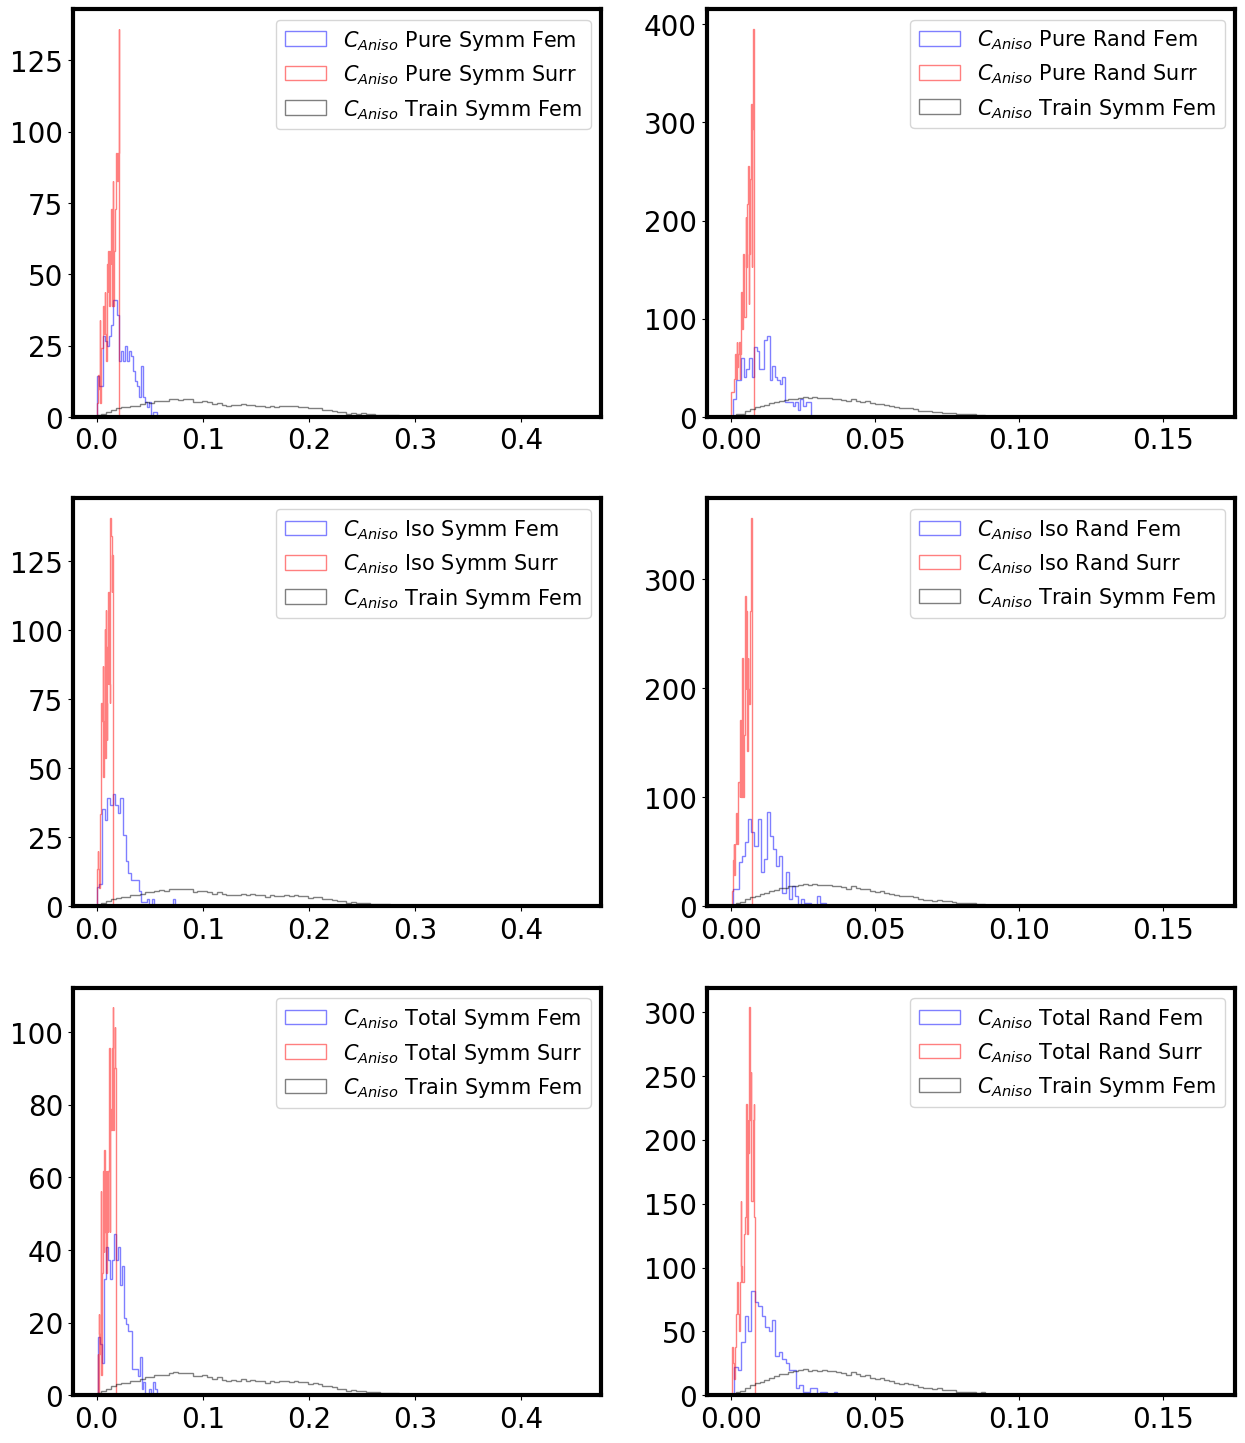

In [202]:
# C_aniso good iso
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows = 3, ncols =2, figsize=(15,18))
# large pure symm
plt_iso_pg_s = ax0.hist(iso_good_s_pg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_pg_s[0])
plt_iso_pg_s_surr = ax0.hist(iso_surr_good_s_pg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_pg_s[1])
plt_iso_train_s = ax0.hist(iso_trn_s.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax0.legend(prop={'size': 15})
ax0.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)
# large pure rand
plt_iso_pg_r = ax1.hist(iso_good_s_pg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_pg_r[0])
plt_iso_pg_r_surr = ax1.hist(iso_surr_good_s_pg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_pg_r[1])
plt_iso_train_s = ax1.hist(iso_trn_r.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax1.legend(prop={'size': 15})
ax1.tick_params(labelsize=font_size)
ax1.spines[['left','right','bottom','top']].set_linewidth(3)
# large iso symm
plt_iso_lg_s = ax2.hist(iso_good_s_sg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_sg_s[0])
plt_iso_lg_s_surr = ax2.hist(iso_surr_good_s_sg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_sg_s[1])
plt_iso_train_s = ax2.hist(iso_trn_s.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax2.legend(prop={'size': 15})
ax2.tick_params(labelsize=font_size)
ax2.spines[['left','right','bottom','top']].set_linewidth(3)
# large iso rand
plt_iso_lg_r = ax3.hist(iso_good_s_sg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_sg_r[0])
plt_iso_lg_r_surr = ax3.hist(iso_surr_good_s_sg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_sg_r[1])
plt_iso_train_s = ax3.hist(iso_trn_r.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax3.legend(prop={'size': 15})
ax3.tick_params(labelsize=font_size)
ax3.spines[['left','right','bottom','top']].set_linewidth(3)
# large total symm
plt_iso_tg_s = ax4.hist(iso_good_s_tg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_tg_s[0])
plt_iso_tg_s_surr = ax4.hist(iso_surr_good_s_tg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_tg_s[1])
plt_iso_train_s = ax4.hist(iso_trn_s.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax4.legend(prop={'size': 15})
ax4.tick_params(labelsize=font_size)
ax4.spines[['left','right','bottom','top']].set_linewidth(3)
# large total rand
plt_iso_tg_r = ax5.hist(iso_good_s_tg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_tg_r[0])
plt_iso_tg_r_surr = ax5.hist(iso_surr_good_s_tg_r.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_tg_r[1])
plt_iso_train_s = ax5.hist(iso_trn_r.reshape(20000,1), bins = 100, density = True, 
                      histtype='step', color = [0,0,0,0.5], label = '$C_{Aniso}$ ' + 'Train Symm Fem')
ax5.legend(prop={'size': 15})
ax5.tick_params(labelsize=font_size)
ax5.spines[['left','right','bottom','top']].set_linewidth(3)

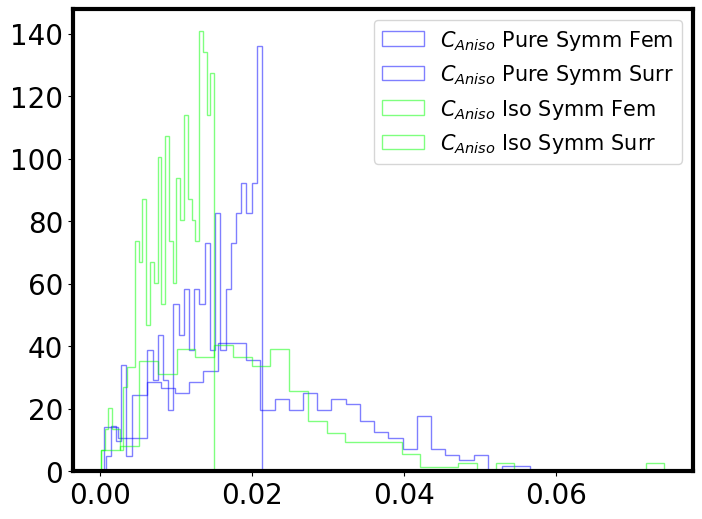

In [204]:
fig, ax0 = plt.subplots(figsize=(8,6))
plt_iso_pg_s = ax0.hist(iso_good_s_pg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_pg_s[0])
plt_iso_pg_s_surr = ax0.hist(iso_surr_good_s_pg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,0,1,0.5], label = '$C_{Aniso}$ ' + labels_pg_s[1])
plt_iso_lg_s = ax0.hist(iso_good_s_sg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,1,0,0.5], label = '$C_{Aniso}$ ' + labels_sg_s[0])
plt_iso_lg_s_surr = ax0.hist(iso_surr_good_s_sg_s.reshape(300,1), bins = 30, density = True, 
                      histtype='step', color = [0,1,0,0.5], label = '$C_{Aniso}$ ' + labels_sg_s[1])
# plt_iso_tg_s = ax0.hist(iso_good_s_tg_s.reshape(300,1), bins = 30, density = True, 
#                       histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_tg_s[0])
# plt_iso_tg_s_surr = ax0.hist(iso_surr_good_s_tg_s.reshape(300,1), bins = 30, density = True, 
#                       histtype='step', color = [1,0,0,0.5], label = '$C_{Aniso}$ ' + labels_tg_s[1])   
ax0.legend(prop={'size': 15})
ax0.tick_params(labelsize=font_size)
ax0.spines[['left','right','bottom','top']].set_linewidth(3)


In [ ]:
m_max = torch.amax(moduli)

m_max_indx = torch.argsort(moduli, dim = 0)[-10:]
print(m_max, m_max_indx)